# Telecom Churn Case Study

## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Ignore warning due to version mismatch
import warnings
warnings.filterwarnings('ignore') 

# To display all the columns
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt 
# scipy libraries
from scipy import stats

#set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:,.2f}'.format 

# Machine Learning related libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA #Importing the PCA module
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF# for VIF
import statsmodels.api as sm



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics


### Load Data into Notebook

In [2]:
data = pd.read_csv('telecom_churn_data.csv')

### Inspect the data

In [3]:
# Check head of the data
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [4]:
# Check data shape
data.shape

(99999, 226)

In [5]:
# Check columns
data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [6]:
# describe the data
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","98,981.00","98,981.00","98,981.00","99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00",

### Data Preparation to find High Value Customers (HVC)

In [7]:
# Rename few Columns
data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 
                     'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)
# Read header
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,4,3,2,

In [8]:
# Get the index of null values for both columns and verify if both matches 

res6 = data.total_rech_data_6[data.total_rech_data_6.isna()].index != data.av_rech_amt_data_6[data.av_rech_amt_data_6.isna()].index
print('June :', res6.any())

res7 = data.total_rech_data_7[data.total_rech_data_7.isna()].index != data.av_rech_amt_data_7[data.av_rech_amt_data_7.isna()].index
print('July :', res7.any())

res8 = data.total_rech_data_8[data.total_rech_data_8.isna()].index != data.av_rech_amt_data_8[data.av_rech_amt_data_8.isna()].index
print('Aug :', res8.any())

June : False
July : False
Aug : False


In [9]:
# finding the count of NULL values in these columns
print(data.loc[:, [col for col in data.columns if 'total_rech_data_' in col]].isnull().sum())
print(data.loc[:, [col for col in data.columns if 'av_rech_amt_data_' in col]].isnull().sum())

total_rech_data_6    74846
total_rech_data_7    74428
total_rech_data_8    73660
total_rech_data_9    74077
dtype: int64
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9    74077
dtype: int64


In [10]:
# Impute values with 0 as these columns are in use for high value customers filter
data.total_rech_data_6.fillna(0, inplace=True)
data.total_rech_data_7.fillna(0, inplace=True)
data.total_rech_data_8.fillna(0, inplace=True)

data.av_rech_amt_data_6.fillna(0, inplace=True)
data.av_rech_amt_data_7.fillna(0, inplace=True)
data.av_rech_amt_data_8.fillna(0, inplace=True)

In [11]:
# Check if there are NULL values in total_rech_amnt and av_rech_amt monthly columns
print(data['total_rech_amt_6'].isna().sum())
print(data['total_rech_amt_7'].isna().sum())
print(data['total_rech_amt_8'].isna().sum())
print(data['av_rech_amt_data_6'].isna().sum())
print(data['av_rech_amt_data_7'].isna().sum())
print(data['av_rech_amt_data_8'].isna().sum())


0
0
0
0
0
0


In [12]:
# Check the information of total recharge amount columns
data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].describe(percentiles=[.25,.5,.75,.90,.95,.99,1])

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
count,"99,999.00","99,999.00","99,999.00"
mean,327.51,322.96,324.16
std,398.02,408.11,416.54
min,0.00,0.00,0.00
25%,109.00,100.00,90.00
50%,230.00,220.00,225.00
75%,437.50,428.00,434.50
90%,732.00,731.00,736.00
95%,994.00,993.00,996.00
99%,"1,683.02","1,728.00","1,721.00"


### Deriving Variables

In [13]:
# Total data recharge amount
data['total_data_rech_amt_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_rech_amt_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data['total_data_rech_amt_8'] = data['total_rech_data_8'] * data['av_rech_amt_data_8']

# Total amount from data recharge and ic/og calls
data['call_data_amt_6'] = data[['total_rech_amt_6','total_data_rech_amt_6']].sum(axis=1)
data['call_data_amt_7'] = data[['total_rech_amt_7','total_data_rech_amt_7']].sum(axis=1)
data['call_data_amt_8'] = data[['total_rech_amt_8','total_data_rech_amt_8']].sum(axis=1)

# Average of amount for first 2 months
data['good_phase_amt_avg'] = data[['call_data_amt_6','call_data_amt_7']].mean(axis=1)
data['action_phase_amt_avg'] = data[['call_data_amt_8']]

In [14]:
data[['good_phase_amt_avg', 'total_rech_amt_6', 'total_rech_amt_7', 
      'total_data_rech_amt_6', 'total_data_rech_amt_7']].head()

,good_phase_amt_avg,total_rech_amt_6,total_rech_amt_7,total_data_rech_amt_6,total_data_rech_amt_7
0,559.00,362,252,252.00,252.00
1,306.00,74,384,0.00,154.00
2,241.50,168,315,0.00,0.00
3,270.00,230,310,0.00,0.00
4,301.00,196,350,56.00,0.00


### Finding High Value Customers

In [15]:
# Print the customers count with recharge amount more than 70th percentile
print("Number of high value filtered customers are : ",
      (data['good_phase_amt_avg'] >= data['good_phase_amt_avg'].quantile(0.7)).value_counts())

print("\n")

# Filter the records of high value customers whose recharge amount should be more than 70th percentile.
data_hvc = data[(data['good_phase_amt_avg'] >= data['good_phase_amt_avg'].quantile(0.7))]

print("70th percentile of the average recharge amount in the first two months  =", 
      data.good_phase_amt_avg.quantile(0.7))

Number of high value filtered customers are :  False    69998
True     30001
Name: good_phase_amt_avg, dtype: int64


70th percentile of the average recharge amount in the first two months  = 478.0


In [16]:
print("Number of rows before filtering the high value customers =", len(data))
data_hvc = pd.DataFrame(data.loc[data['good_phase_amt_avg'] >= data.good_phase_amt_avg.quantile(0.7)])
print("Number of rows after filtering the high value customers =", len(data_hvc))

Number of rows before filtering the high value customers = 99999
Number of rows after filtering the high value customers = 30001


In [17]:
data_hvc.shape

(30001, 234)

#### Comments : Number of Rows after filtering high value customers is 30001

### Create Target Variable (Churn)

In [18]:
data_hvc['churn'] = np.where(
                            ((data_hvc['total_ic_mou_9'] == 0.00) | (data_hvc['total_og_mou_9'] == 0.00))
                            & ((data_hvc['vol_2g_mb_9'] == 0.00) | (data_hvc['vol_3g_mb_9'] == 0.00)), 1, 0)

print(data_hvc['churn'].value_counts())
print(data_hvc['churn'].value_counts()/data_hvc.shape[0])

0    26735
1     3266
Name: churn, dtype: int64
0   0.89
1   0.11
Name: churn, dtype: float64


In [19]:
data_hvc[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,churn,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,1,0.00,0.00,0.00,0.00
7,1,0.00,0.00,0.00,0.00
8,0,34.91,142.18,0.00,0.00
21,0,252.61,"1,031.53",0.00,0.00
23,0,127.48,127.63,13.93,314.74


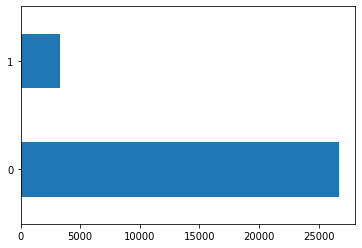

In [20]:
# Check the unique values count in churn column
data_hvc.churn.value_counts()
data_hvc['churn'].value_counts().plot(kind='barh')

### Missing Data Handling

In [21]:
# function to Calculate percentage
def calc_percentage(value, base, round_digits = 2):
    return round((value/base)*100, round_digits)

In [22]:
# Function to drop one or more columns

def dropCols(df, column_list):
    for column in column_list:
        print('Dropping', column, '...')
        try:
            df.drop(column, axis=1, inplace=True)
        except:
            print('\tColumn already dropped...')
            continue

In [23]:
# find the columns which has name ends with _9 attribute as we dont need 9th month data.
month_9_columns = data_hvc.columns[data_hvc.columns.str.endswith(pat = '_9')]
print("The columns names ends with _9 are given below...")
month_9_columns

The columns names ends with _9 are given below...


Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [24]:
# Drop all the columns of churn phase (9th month columns)
dropCols(data_hvc, month_9_columns)
data_hvc.head()

Dropping last_date_of_month_9 ...
Dropping arpu_9 ...
Dropping onnet_mou_9 ...
Dropping offnet_mou_9 ...
Dropping roam_ic_mou_9 ...
Dropping roam_og_mou_9 ...
Dropping loc_og_t2t_mou_9 ...
Dropping loc_og_t2m_mou_9 ...
Dropping loc_og_t2f_mou_9 ...
Dropping loc_og_t2c_mou_9 ...
Dropping loc_og_mou_9 ...
Dropping std_og_t2t_mou_9 ...
Dropping std_og_t2m_mou_9 ...
Dropping std_og_t2f_mou_9 ...
Dropping std_og_t2c_mou_9 ...
Dropping std_og_mou_9 ...
Dropping isd_og_mou_9 ...
Dropping spl_og_mou_9 ...
Dropping og_others_9 ...
Dropping total_og_mou_9 ...
Dropping loc_ic_t2t_mou_9 ...
Dropping loc_ic_t2m_mou_9 ...
Dropping loc_ic_t2f_mou_9 ...
Dropping loc_ic_mou_9 ...
Dropping std_ic_t2t_mou_9 ...
Dropping std_ic_t2m_mou_9 ...
Dropping std_ic_t2f_mou_9 ...
Dropping std_ic_t2o_mou_9 ...
Dropping std_ic_mou_9 ...
Dropping total_ic_mou_9 ...
Dropping spl_ic_mou_9 ...
Dropping isd_ic_mou_9 ...
Dropping ic_others_9 ...
Dropping total_rech_num_9 ...
Dropping total_rech_amt_9 ...
Dropping max_rech

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,call_data_amt_6,call_data_amt_7,call_data_amt_8,good_phase_amt_avg,action_phase_amt_avg,churn
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,197.38,214.82,213.80,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,4.13,nan,nan,1.15,nan,nan,5.44,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,0.00,0.00,5.44,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.00,1.00,1.00,252.00,252.00,252.00,0.00,0.00,0.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.00,0.00,0.00,0,0,0,0,0,0,1,1,1,0,0,0,1.00,1.00,1.00,968,30.40,0.00,101.20,252.00,252.00,252.00,614.00,504.00,504.00,559.00,504.00,1
7,7000701601,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.00,0.00,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350

In [25]:
# Check Missing value percentage for each columns
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((data_hvc.isnull().sum()/len(data_hvc))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
133,count_rech_3g_8,46.83
148,arpu_2g_8,46.83
121,date_of_last_rech_data_8,46.83
130,count_rech_2g_8,46.83
151,night_pck_user_8,46.83
127,max_rech_data_8,46.83
166,fb_user_8,46.83
145,arpu_3g_8,46.83
149,night_pck_user_6,44.15
143,arpu_3g_6,44.15


In [26]:
# Check the Shape of the high value customer dataframe
nRow, nCol = data_hvc.shape
print("There are ",nRow ,"rows and ",nCol," columns")

There are  30001 rows and  180  columns


In [27]:
# Delete all such columns having unique values less than 2
count = 0
cols = []
for col in data_hvc.columns:
    if data_hvc[col].nunique() < 2 or data_hvc[col].nunique() == nRow:
        count+=1
        print(count, " ColName = ", col,
              ",\t UniqueValues = ", data_hvc[col].unique(),
              ",\t Dtype = ", data_hvc[col].dtype)
        cols.append(col)

1  ColName =  mobile_number ,	 UniqueValues =  [7000842753 7000701601 7001524846 ... 7001729035 7002111859 7000498689] ,	 Dtype =  int64
2  ColName =  circle_id ,	 UniqueValues =  [109] ,	 Dtype =  int64
3  ColName =  loc_og_t2o_mou ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
4  ColName =  std_og_t2o_mou ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
5  ColName =  loc_ic_t2o_mou ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
6  ColName =  last_date_of_month_6 ,	 UniqueValues =  ['6/30/2014'] ,	 Dtype =  object
7  ColName =  last_date_of_month_7 ,	 UniqueValues =  ['7/31/2014' nan] ,	 Dtype =  object
8  ColName =  last_date_of_month_8 ,	 UniqueValues =  ['8/31/2014' nan] ,	 Dtype =  object
9  ColName =  std_og_t2c_mou_6 ,	 UniqueValues =  [nan  0.] ,	 Dtype =  float64
10  ColName =  std_og_t2c_mou_7 ,	 UniqueValues =  [nan  0.] ,	 Dtype =  float64
11  ColName =  std_og_t2c_mou_8 ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
12  ColName =  std_ic_t2o_mou_6 ,	 UniqueValues =  

In [28]:
# Drop these above columns
dropCols(data_hvc, cols)

# Check the dataframe shape
nRow, nCol = data_hvc.shape
print("In df_hvc, there are ",nRow ,"rows and ",nCol," columns now")

Dropping mobile_number ...
Dropping circle_id ...
Dropping loc_og_t2o_mou ...
Dropping std_og_t2o_mou ...
Dropping loc_ic_t2o_mou ...
Dropping last_date_of_month_6 ...
Dropping last_date_of_month_7 ...
Dropping last_date_of_month_8 ...
Dropping std_og_t2c_mou_6 ...
Dropping std_og_t2c_mou_7 ...
Dropping std_og_t2c_mou_8 ...
Dropping std_ic_t2o_mou_6 ...
Dropping std_ic_t2o_mou_7 ...
Dropping std_ic_t2o_mou_8 ...
In df_hvc, there are  30001 rows and  166  columns now


In [29]:
null_percentage = 0.70
na_perc_rows = round(data_hvc.isnull().sum(axis=1) / len(data_hvc.columns),2 )
print("\nBefore dropping : Number of rows which has more than 70% NULL values = ", na_perc_rows[na_perc_rows > null_percentage].count())

thres = np.int(len(data_hvc.columns)*round(1-null_percentage, 1))
print("Before dropping : Threshold value = ", thres)

print("Before dropping : Total Number of rows = ", len(data_hvc))
data_hvc.dropna(thresh=thres,inplace=True)

na_perc_rows = round(data_hvc.isnull().sum(axis=1) / len(data_hvc.columns),2 )
print("\nAfter dropping : Number of rows which has more than 70% NULL values = ", na_perc_rows[na_perc_rows > null_percentage].count())
print("After dropping : Total Number of rows = ", len(data_hvc))


Before dropping : Number of rows which has more than 70% NULL values =  0
Before dropping : Threshold value =  49
Before dropping : Total Number of rows =  30001

After dropping : Number of rows which has more than 70% NULL values =  0
After dropping : Total Number of rows =  30001


In [30]:
na_percent = round(data_hvc.isnull().sum() / len(data_hvc.index) * 100, 2)
na_percent = na_percent[na_percent > 0]
print("Number of columns which has atleast one null value is", na_percent.count())
na_percent.sort_values(ascending=False)

Number of columns which has atleast one null value is 108


fb_user_8                  46.83
arpu_2g_8                  46.83
count_rech_2g_8            46.83
count_rech_3g_8            46.83
date_of_last_rech_data_8   46.83
max_rech_data_8            46.83
arpu_3g_8                  46.83
night_pck_user_8           46.83
date_of_last_rech_data_6   44.15
arpu_2g_6                  44.15
night_pck_user_6           44.15
arpu_3g_6                  44.15
max_rech_data_6            44.15
count_rech_3g_6            44.15
fb_user_6                  44.15
count_rech_2g_6            44.15
fb_user_7                  43.15
max_rech_data_7            43.15
date_of_last_rech_data_7   43.15
count_rech_2g_7            43.15
arpu_3g_7                  43.15
arpu_2g_7                  43.15
night_pck_user_7           43.15
count_rech_3g_7            43.15
std_og_t2t_mou_8            3.91
loc_ic_t2f_mou_8            3.91
loc_ic_t2t_mou_8            3.91
og_others_8                 3.91
spl_og_mou_8                3.91
isd_og_mou_8                3.91
std_og_mou

### Numeric and Categoric Variable analysis

In [31]:
#Function to check categorical or continuous columns
def column_type_analysis(dataframe):
    numerical_df = dataframe.select_dtypes(include='number')
    categorical_df = dataframe.select_dtypes(exclude='number')
    print('Total Numerical columns : {}'.format(numerical_df.shape[1]))
    print('Total Categorical columns : {}'.format(categorical_df.shape[1]))
    return numerical_df, categorical_df

In [32]:
numerical_columns_df, categorical_columns_df = column_type_analysis(data_hvc)

Total Numerical columns : 160
Total Categorical columns : 6


In [33]:
print(data_hvc.shape)
print(numerical_columns_df.shape)
print(categorical_columns_df.shape)


(30001, 166)
(30001, 160)
(30001, 6)


In [34]:
# Changing the datatype of Categoric variables
data_hvc['night_pck_user_6'] = data_hvc['night_pck_user_6'].astype('object')
data_hvc['night_pck_user_7'] = data_hvc['night_pck_user_6'].astype('object')
data_hvc['night_pck_user_8'] = data_hvc['night_pck_user_6'].astype('object')
data_hvc['fb_user_6'] = data_hvc['night_pck_user_6'].astype('object')
data_hvc['fb_user_7'] = data_hvc['night_pck_user_6'].astype('object')
data_hvc['fb_user_8'] = data_hvc['night_pck_user_6'].astype('object')
data_hvc['churn'] = data_hvc['churn'].astype('object')

In [35]:
numerical_columns_df, categorical_columns_df = column_type_analysis(data_hvc)


Total Numerical columns : 153
Total Categorical columns : 13


In [36]:
# Drop the Date columns as it is having high null value
cols = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
dropCols(data_hvc, cols)

Dropping date_of_last_rech_data_6 ...
Dropping date_of_last_rech_data_7 ...
Dropping date_of_last_rech_data_8 ...


In [37]:
tel_numerical_columns_df, tel_categorical_columns_df = column_type_analysis(data_hvc)

Total Numerical columns : 153
Total Categorical columns : 10


### Missing Data Imputation (Numeric & Categoric)

In [38]:
tel_numerical_columns_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,call_data_amt_6,call_data_amt_7,call_data_amt_8,good_phase_amt_avg,action_phase_amt_avg
0,197.38,214.82,213.80,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,4.13,nan,nan,1.15,nan,nan,5.44,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,0.00,0.00,5.44,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.00,1.00,1.00,252.00,252.00,252.00,0.00,0.00,0.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.00,252.00,252.00,614.00,504.00,504.00,559.00,504.00
7,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.00,0.00,1580.00,790.00,3638.00,1185.00,3638.00
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00

In [39]:
data_hvc[tel_numerical_columns_df.columns].isnull().mean()

arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
onnet_mou_6             0.02
onnet_mou_7             0.02
onnet_mou_8             0.04
offnet_mou_6            0.02
offnet_mou_7            0.02
offnet_mou_8            0.04
roam_ic_mou_6           0.02
roam_ic_mou_7           0.02
roam_ic_mou_8           0.04
roam_og_mou_6           0.02
roam_og_mou_7           0.02
roam_og_mou_8           0.04
loc_og_t2t_mou_6        0.02
loc_og_t2t_mou_7        0.02
loc_og_t2t_mou_8        0.04
loc_og_t2m_mou_6        0.02
loc_og_t2m_mou_7        0.02
loc_og_t2m_mou_8        0.04
loc_og_t2f_mou_6        0.02
loc_og_t2f_mou_7        0.02
loc_og_t2f_mou_8        0.04
loc_og_t2c_mou_6        0.02
loc_og_t2c_mou_7        0.02
loc_og_t2c_mou_8        0.04
loc_og_mou_6            0.02
loc_og_mou_7            0.02
loc_og_mou_8            0.04
std_og_t2t_mou_6        0.02
std_og_t2t_mou_7        0.02
std_og_t2t_mou_8        0.04
std_og_t2m_mou_6        0.02
std_og_t2m_mou

In [40]:
# Impute missing Numeric values with its mean value
for col in tel_numerical_columns_df.columns:
    data_hvc[col].fillna(data_hvc[col].mean(), inplace= True)

In [41]:
data_hvc[tel_numerical_columns_df.columns].isnull().mean()

arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
onnet_mou_6             0.00
onnet_mou_7             0.00
onnet_mou_8             0.00
offnet_mou_6            0.00
offnet_mou_7            0.00
offnet_mou_8            0.00
roam_ic_mou_6           0.00
roam_ic_mou_7           0.00
roam_ic_mou_8           0.00
roam_og_mou_6           0.00
roam_og_mou_7           0.00
roam_og_mou_8           0.00
loc_og_t2t_mou_6        0.00
loc_og_t2t_mou_7        0.00
loc_og_t2t_mou_8        0.00
loc_og_t2m_mou_6        0.00
loc_og_t2m_mou_7        0.00
loc_og_t2m_mou_8        0.00
loc_og_t2f_mou_6        0.00
loc_og_t2f_mou_7        0.00
loc_og_t2f_mou_8        0.00
loc_og_t2c_mou_6        0.00
loc_og_t2c_mou_7        0.00
loc_og_t2c_mou_8        0.00
loc_og_mou_6            0.00
loc_og_mou_7            0.00
loc_og_mou_8            0.00
std_og_t2t_mou_6        0.00
std_og_t2t_mou_7        0.00
std_og_t2t_mou_8        0.00
std_og_t2m_mou_6        0.00
std_og_t2m_mou

In [42]:
data_hvc[tel_categorical_columns_df.columns].isnull().mean()

date_of_last_rech_6   0.00
date_of_last_rech_7   0.00
date_of_last_rech_8   0.02
night_pck_user_6      0.44
night_pck_user_7      0.44
night_pck_user_8      0.44
fb_user_6             0.44
fb_user_7             0.44
fb_user_8             0.44
churn                 0.00
dtype: float64

In [43]:
# Impute missing categoric values with -1 (to be sure not to loss data)
for col in tel_categorical_columns_df.columns:
    data_hvc[col].fillna(-1, inplace= True)

In [44]:
data_hvc['date_of_last_rech_6'] = pd.to_datetime(data_hvc.date_of_last_rech_6).dt.day
data_hvc['date_of_last_rech_7'] = pd.to_datetime(data_hvc.date_of_last_rech_7).dt.day
data_hvc['date_of_last_rech_8'] = pd.to_datetime(data_hvc.date_of_last_rech_8).dt.day

In [45]:
data_hvc[tel_categorical_columns_df.columns].isnull().mean()

date_of_last_rech_6   0.00
date_of_last_rech_7   0.00
date_of_last_rech_8   0.00
night_pck_user_6      0.00
night_pck_user_7      0.00
night_pck_user_8      0.00
fb_user_6             0.00
fb_user_7             0.00
fb_user_8             0.00
churn                 0.00
dtype: float64

### Outlier Analysis

In [46]:
data_hvc[tel_numerical_columns_df.columns].describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,call_data_amt_6,call_data_amt_7,call_data_amt_8,good_phase_amt_avg,action_phase_amt_avg
count,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00
mean,558.49,560.78,508.60,265.62,272.70,243.65,380.61,384.99,348.72,16.41,12.87,13.01,27.06,20.52,20.67,86.05,87.24,81.26,166.26,165.98,157.94,6.46,6.54,6.13,1.60,1.92,1.78,258.78,259.77,245.33,168.95,177.41,154.49,182.75,191.35,163.76,1.84,1.86,1.65,353.55,370.62,319.90,2.21,2.14,2.03,5.93,7.24,6.82,0.67,0.04,0.06,609.87,628.37,551.68,66.66,67.85,65.17,153.20,154.39,152

From the above we could see data is having Outliers

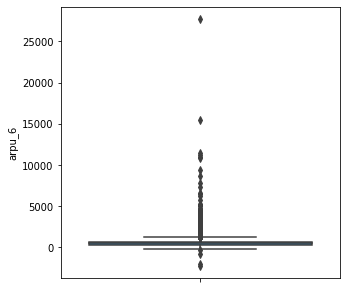

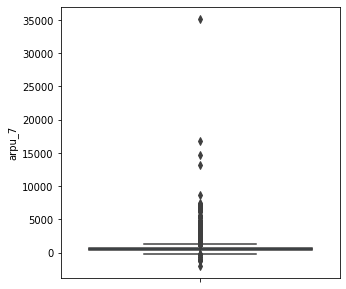

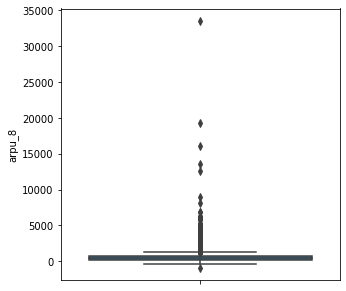

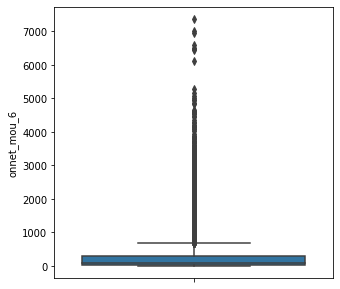

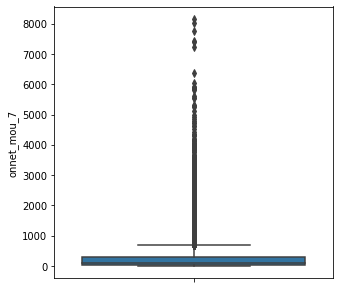

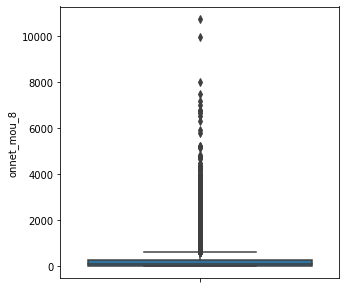

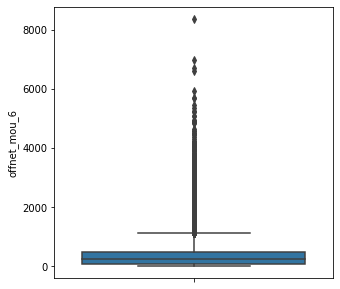

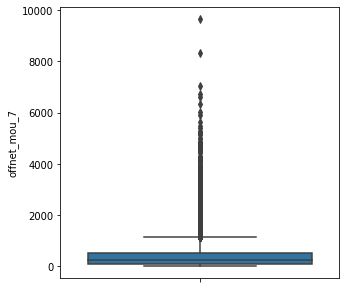

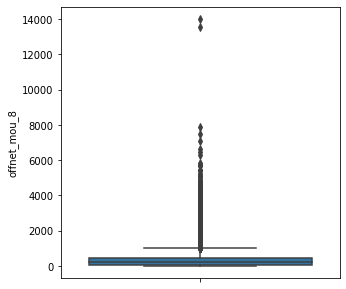

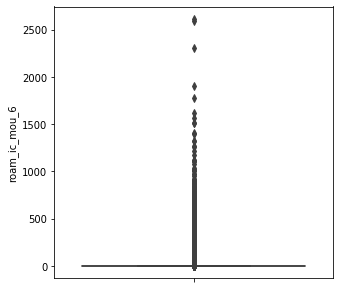

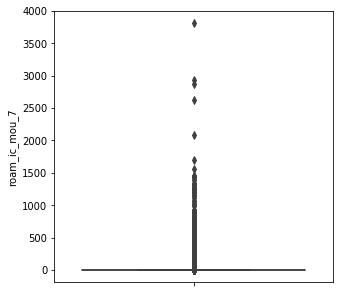

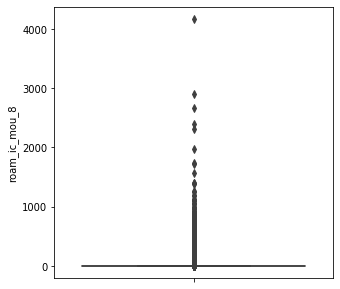

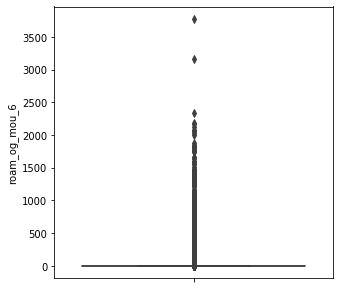

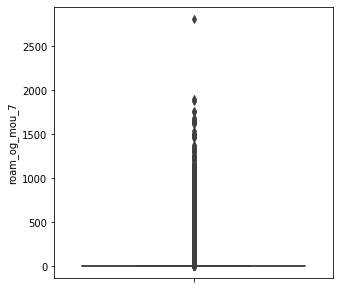

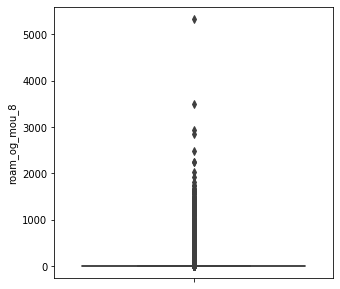

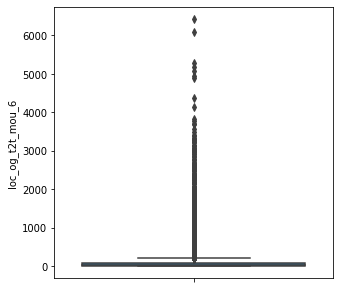

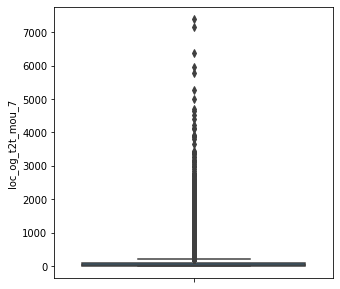

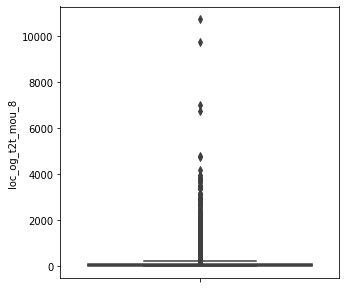

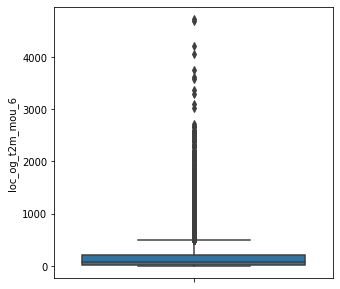

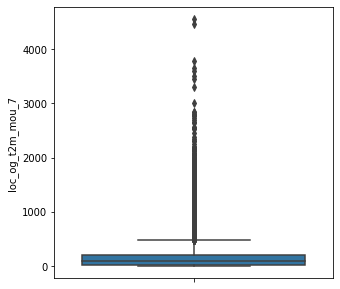

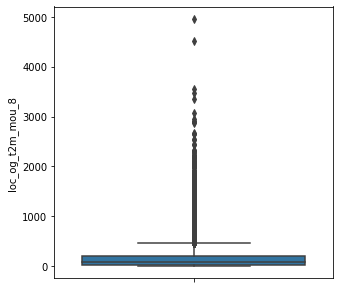

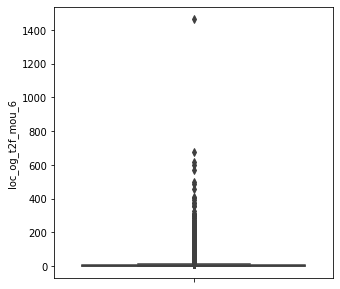

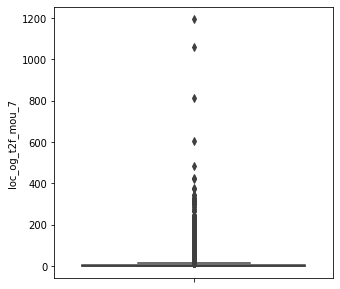

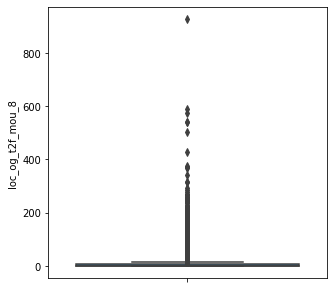

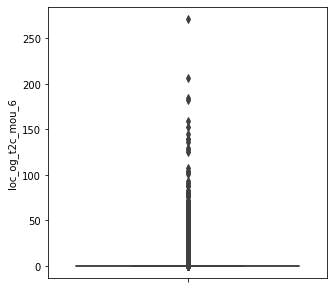

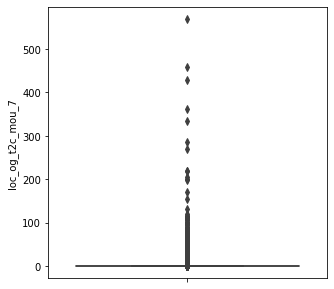

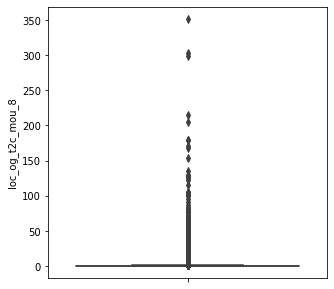

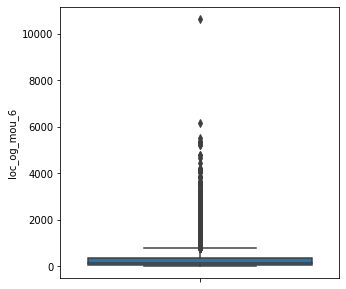

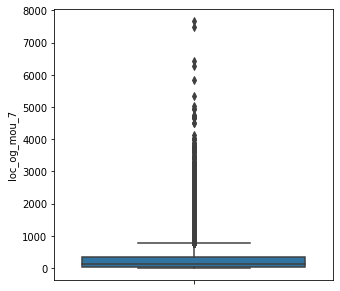

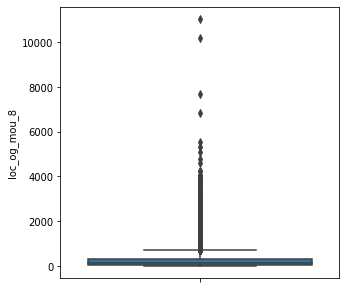

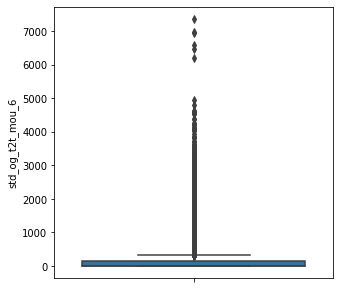

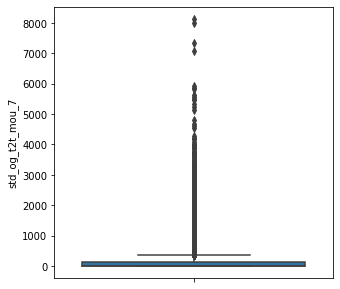

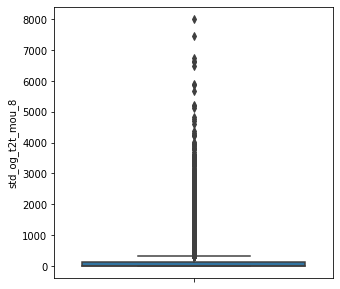

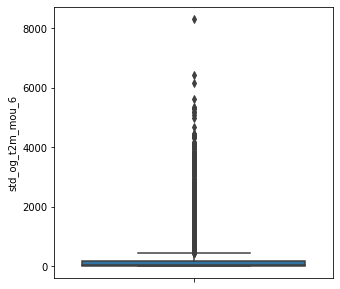

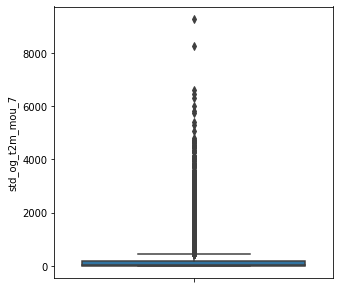

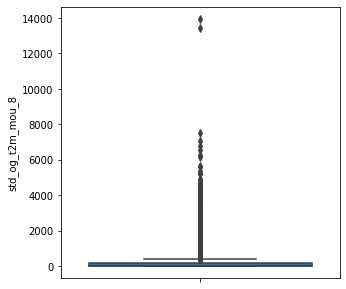

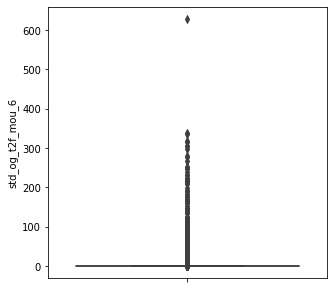

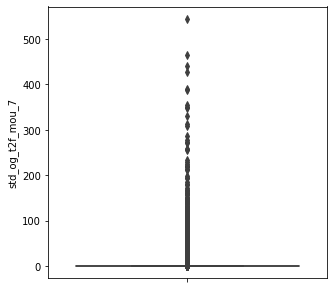

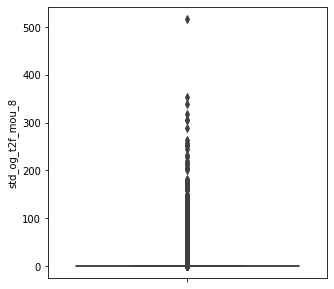

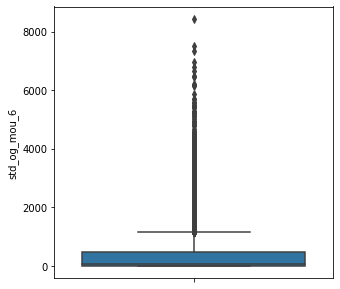

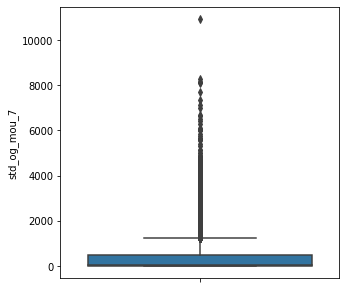

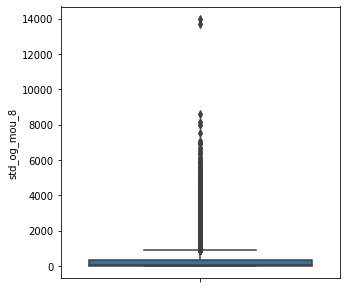

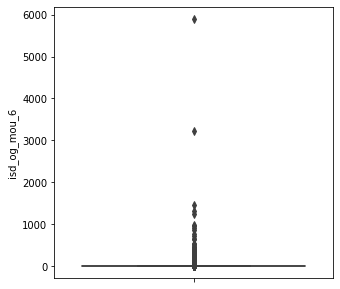

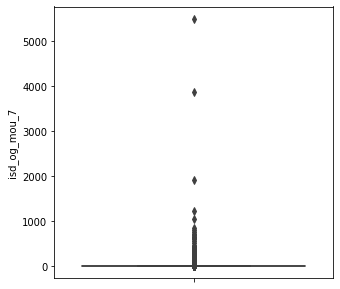

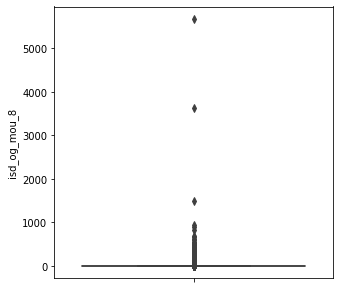

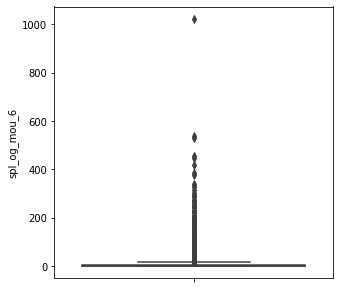

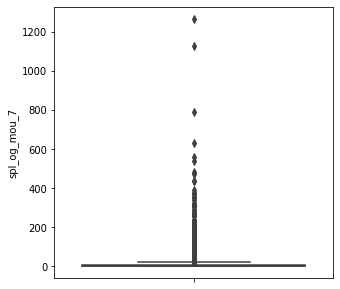

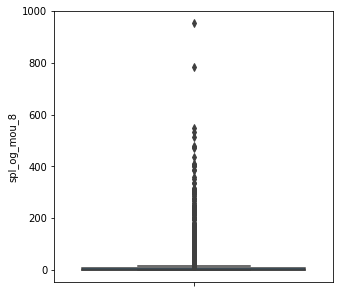

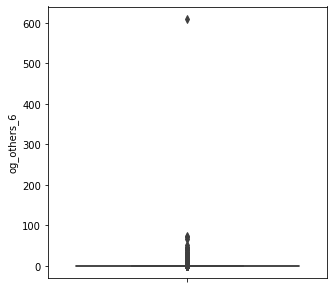

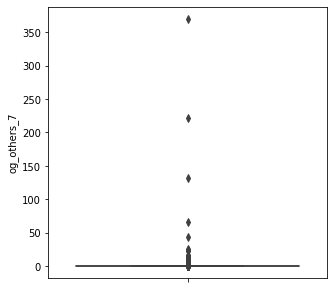

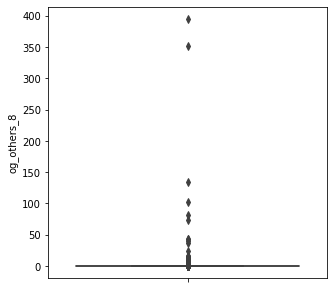

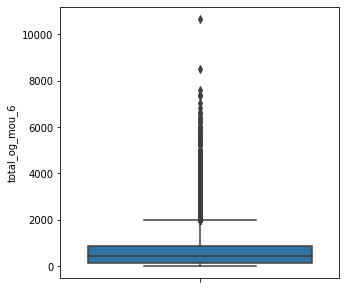

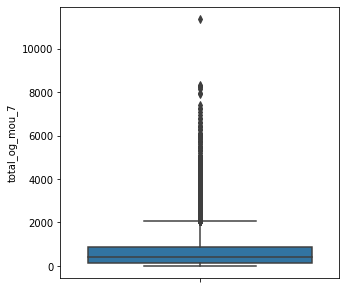

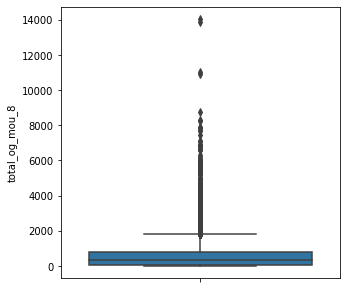

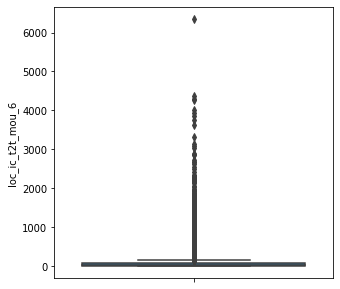

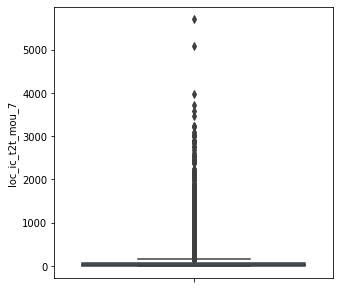

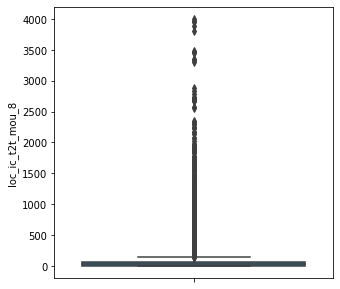

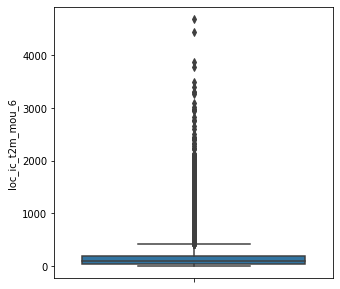

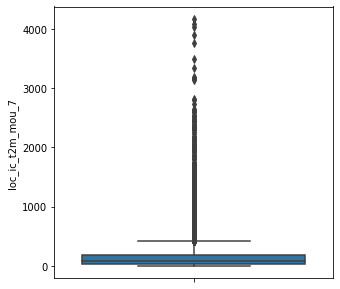

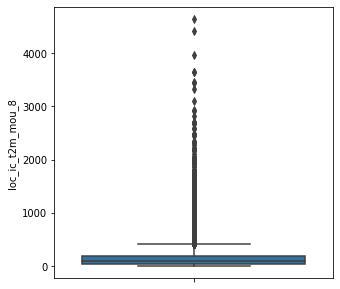

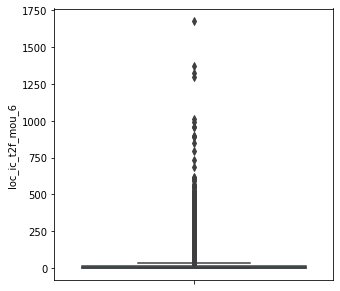

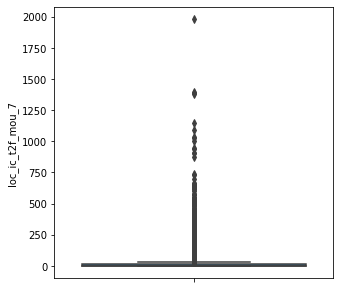

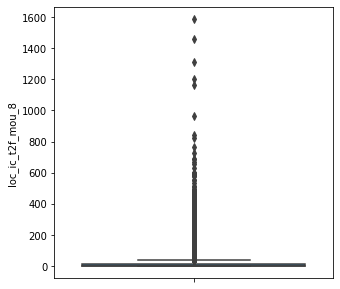

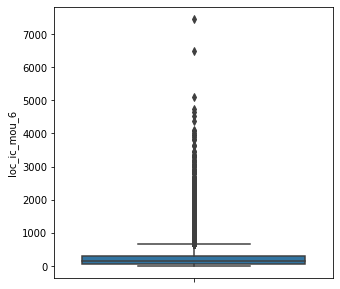

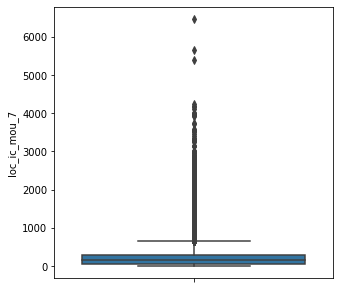

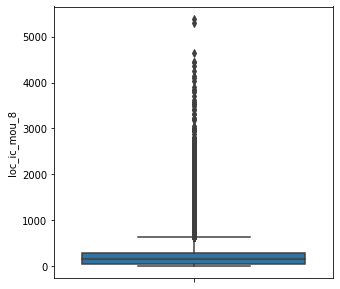

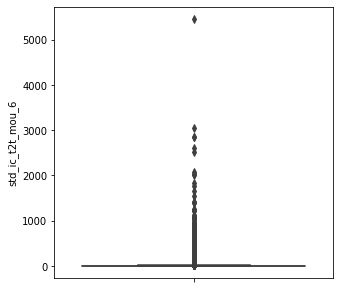

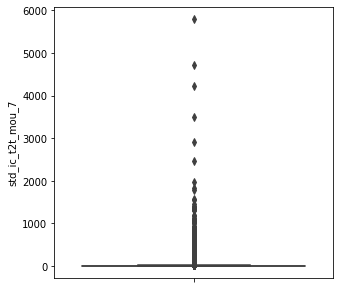

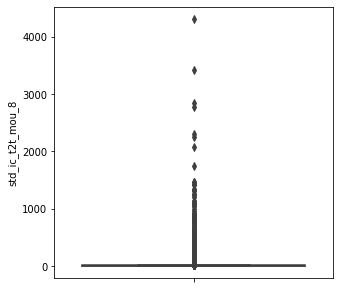

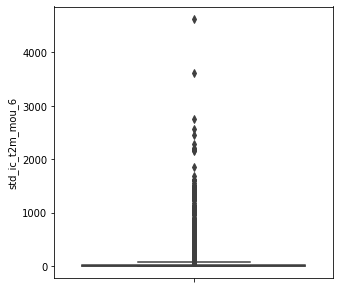

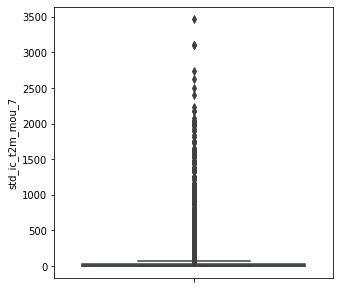

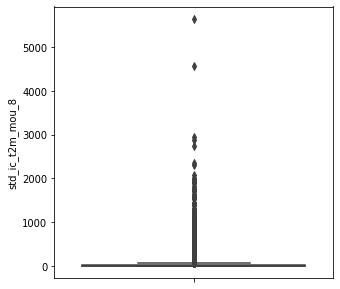

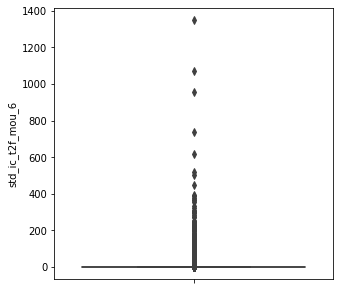

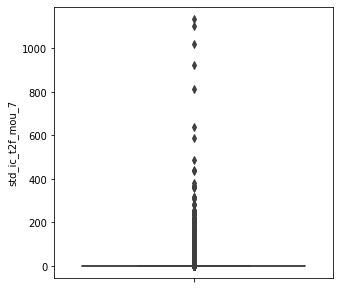

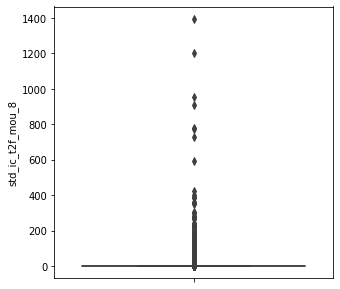

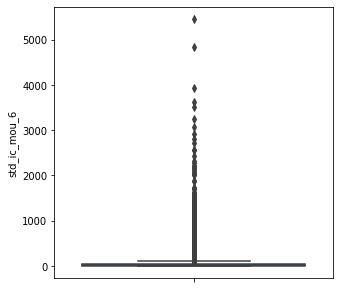

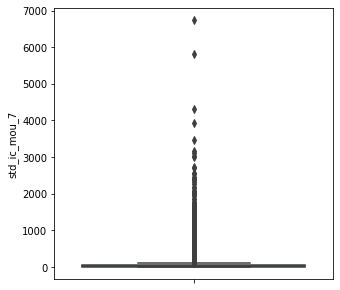

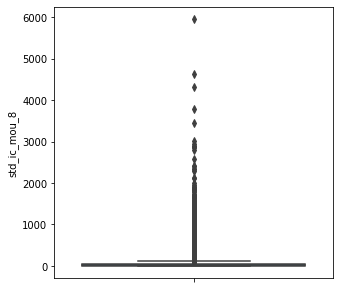

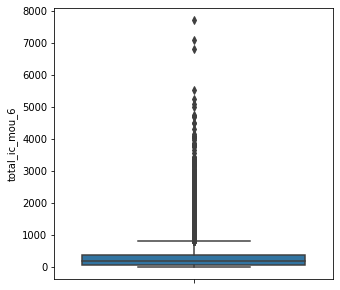

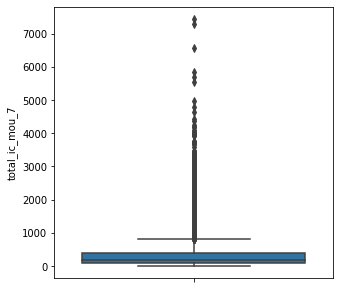

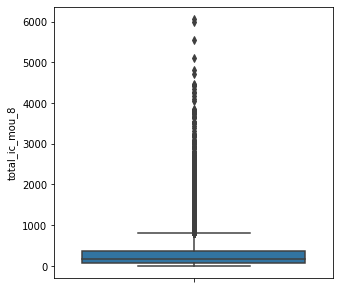

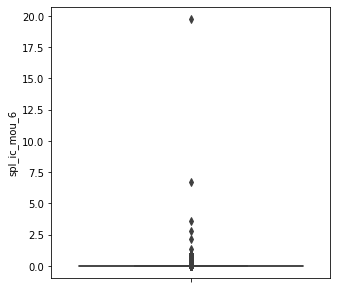

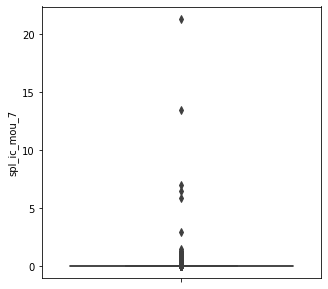

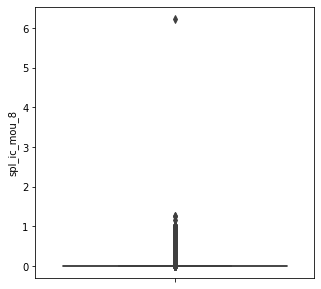

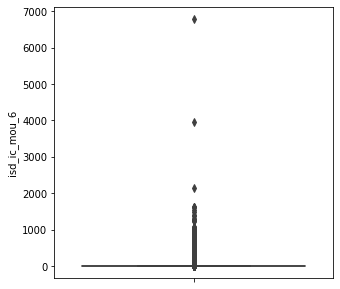

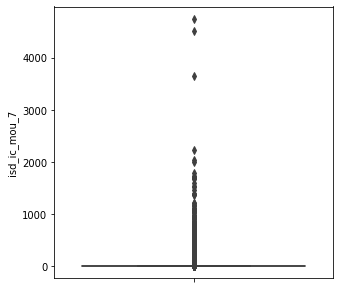

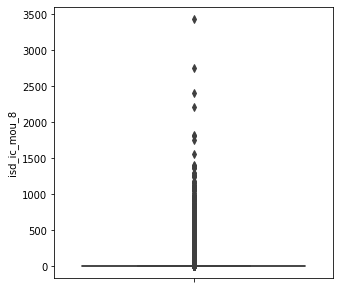

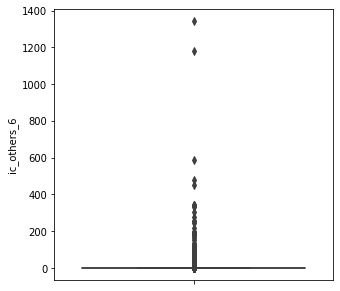

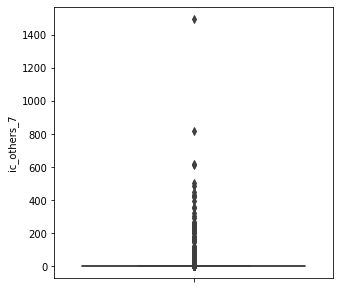

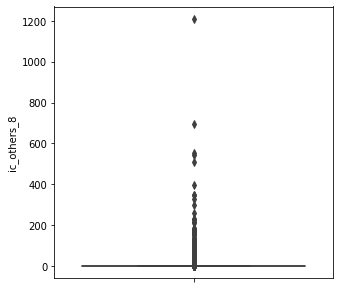

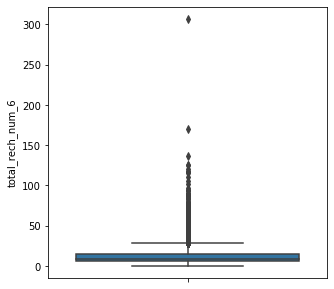

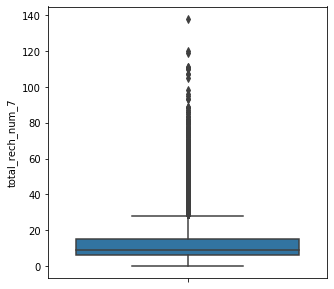

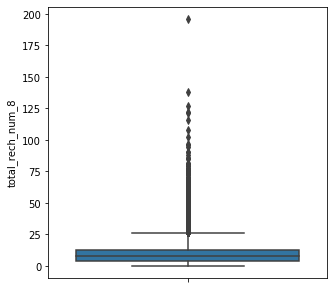

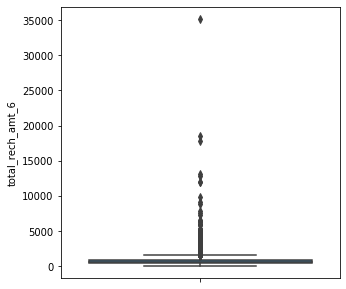

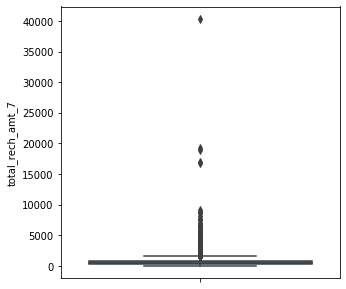

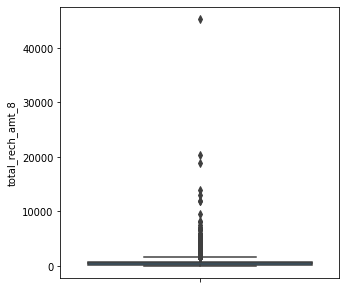

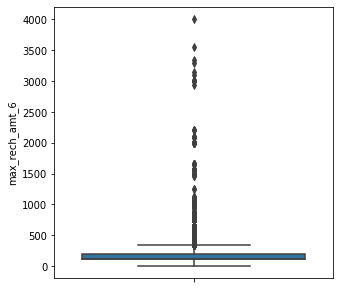

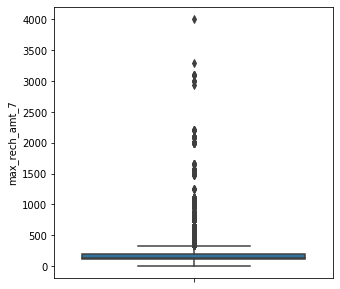

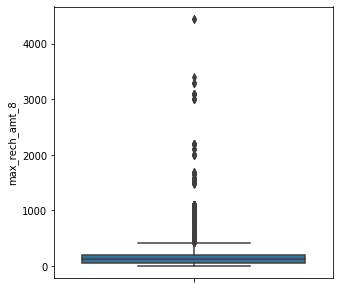

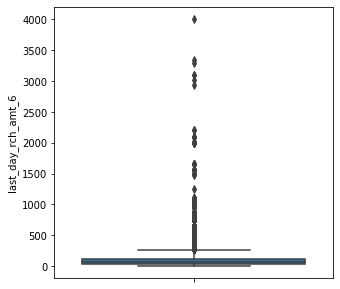

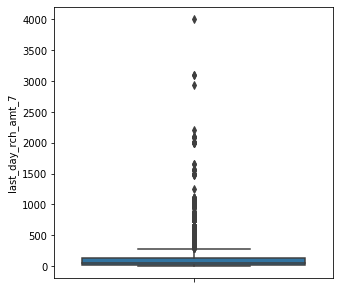

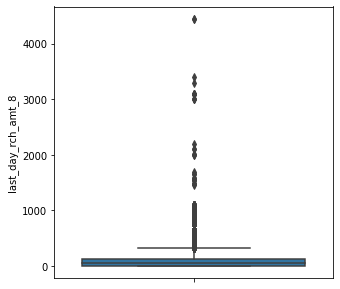

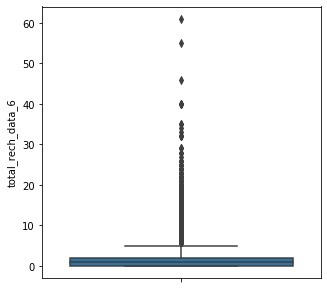

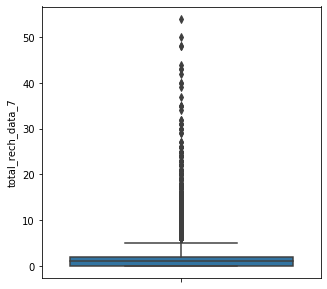

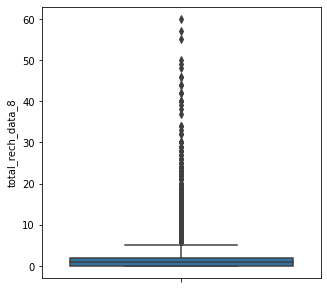

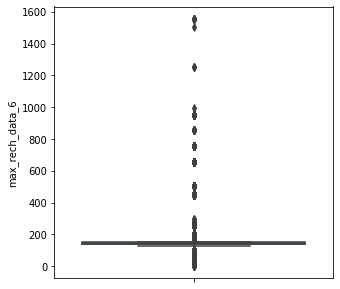

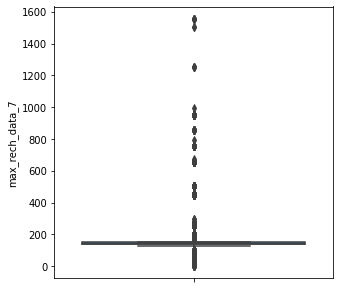

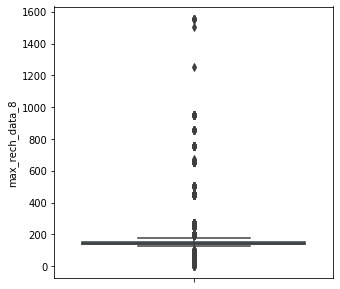

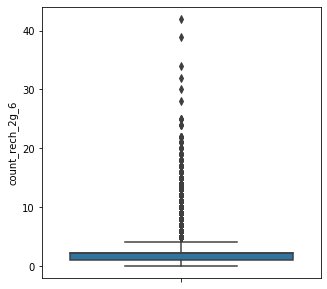

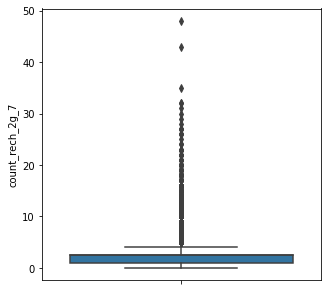

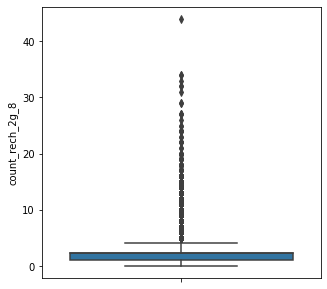

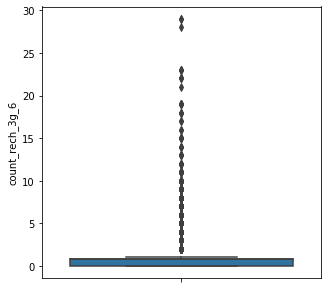

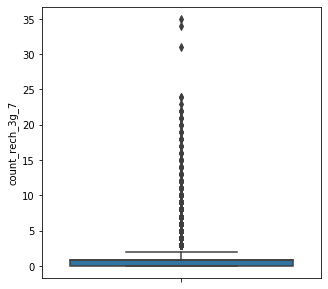

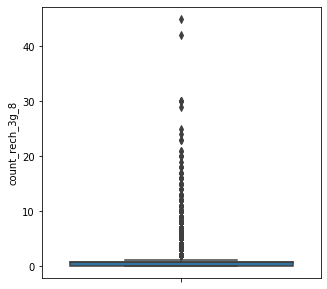

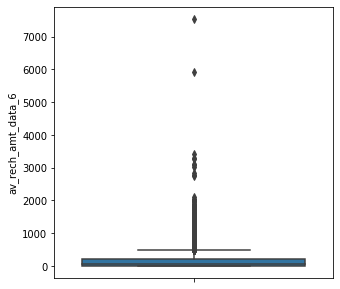

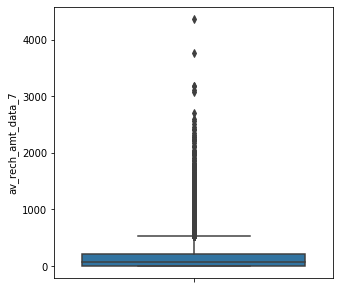

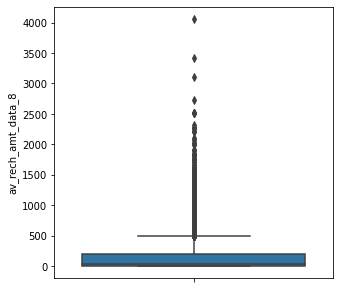

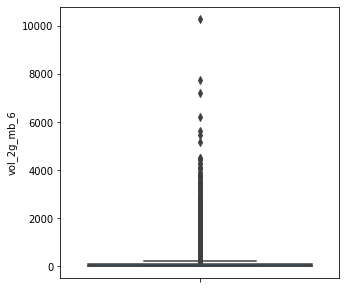

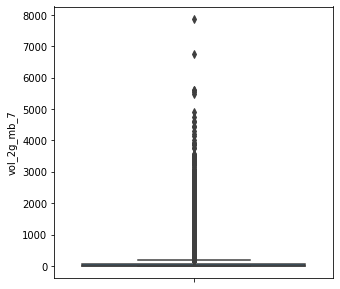

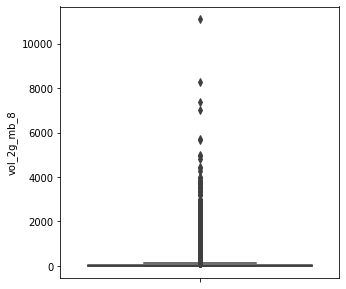

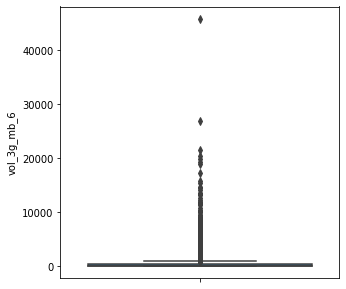

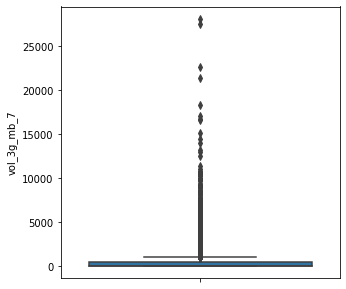

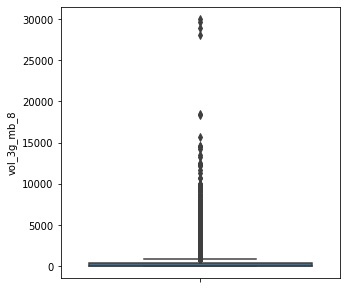

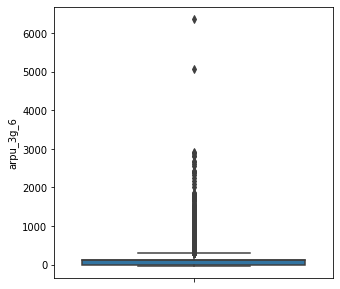

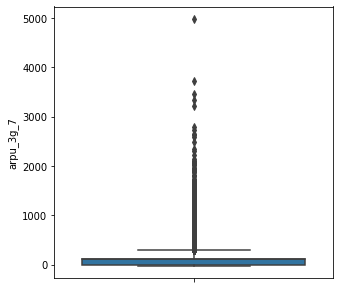

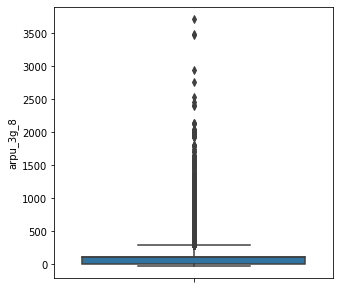

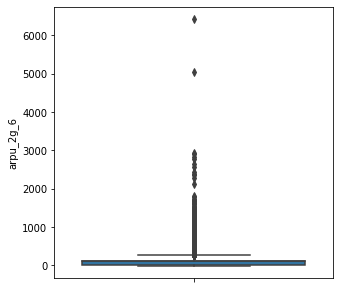

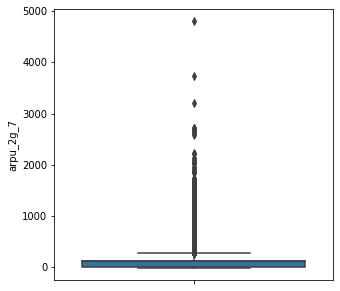

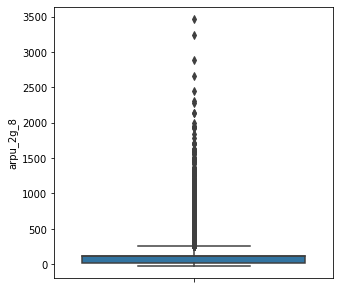

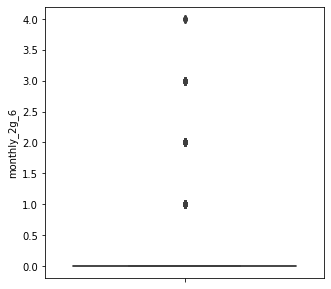

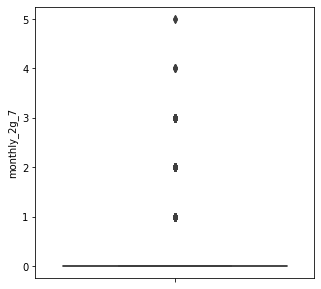

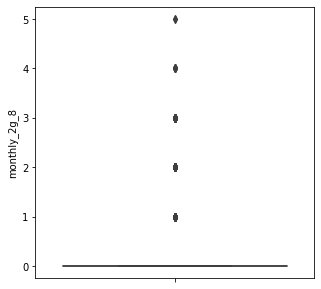

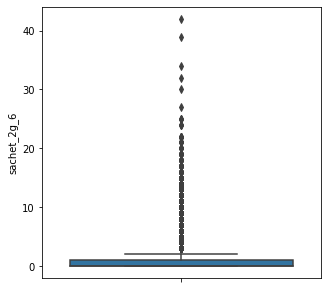

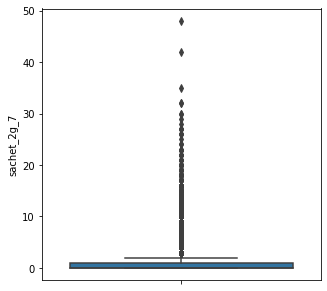

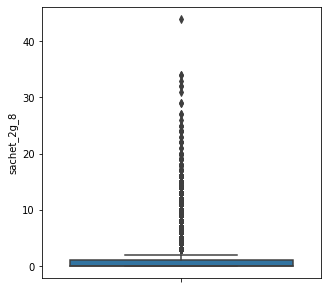

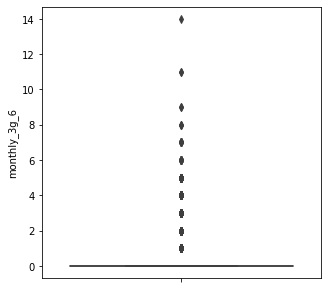

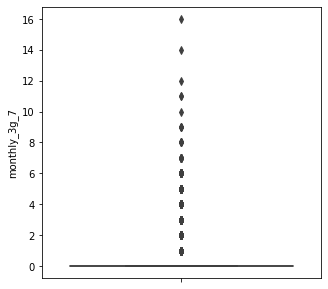

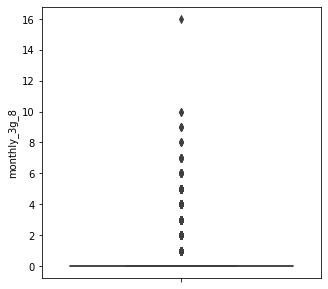

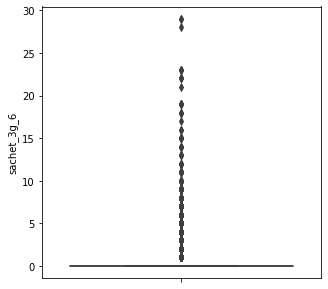

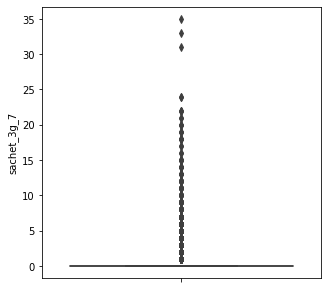

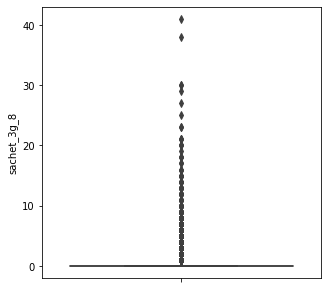

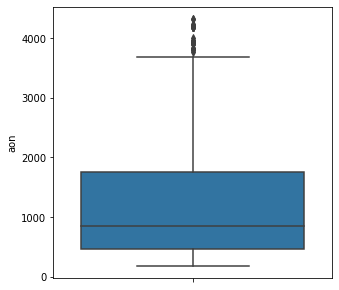

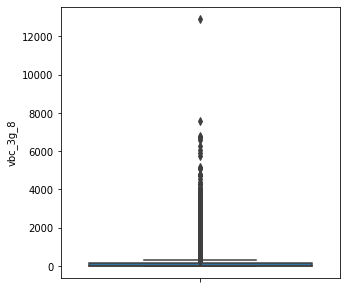

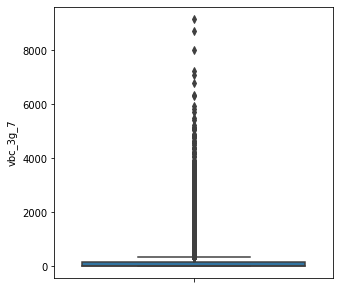

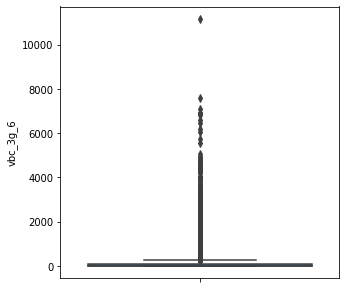

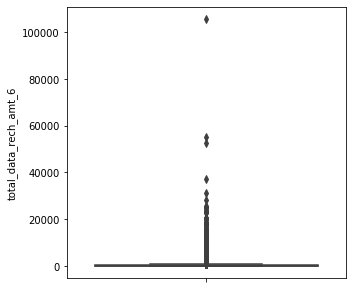

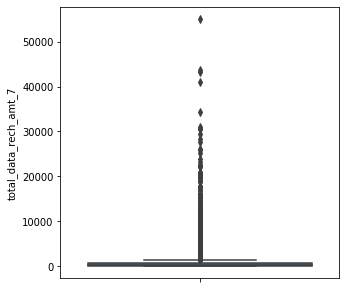

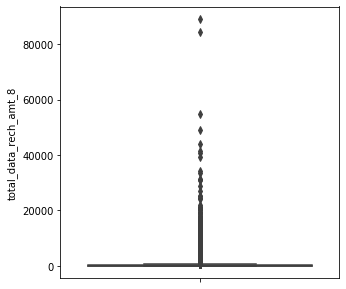

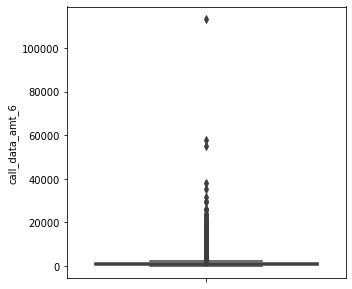

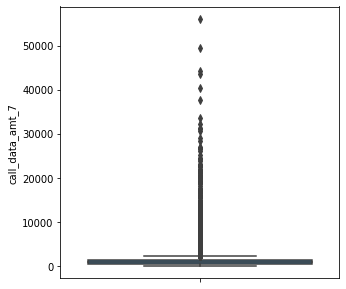

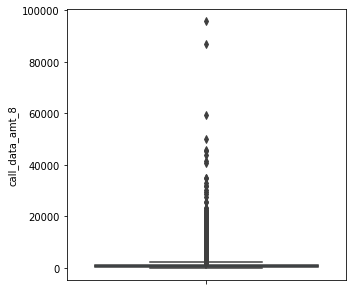

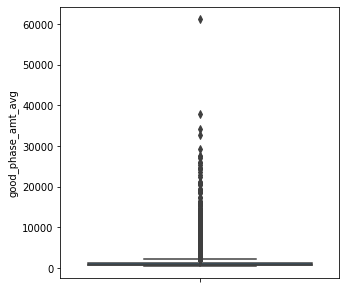

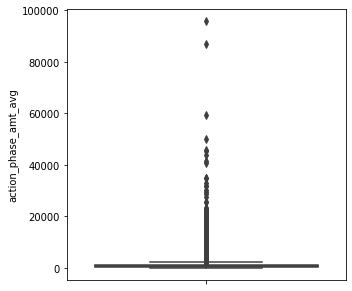

In [47]:
# PLot to visualize the outliers

cont_cols = [col for col in tel_numerical_columns_df.columns ]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=data_hvc)

In [48]:
# Cap lower level outliers with 0.01 and high with 0.99 quantile values
for col in tel_numerical_columns_df.columns:
    percentiles = data_hvc[col].quantile([0.01,0.99]).values
    data_hvc[col][data_hvc[col] <= percentiles[0]] = percentiles[0]
    data_hvc[col][data_hvc[col] >= percentiles[1]] = percentiles[1]

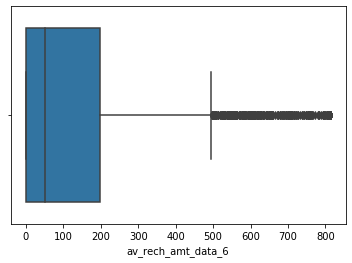

In [49]:
#  Example PLot to visualize the outliers
sns.boxplot(data_hvc.av_rech_amt_data_6)
plt.show()

### Perform EDA on the Data

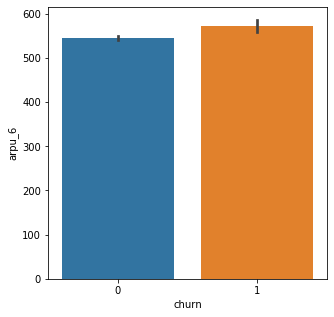

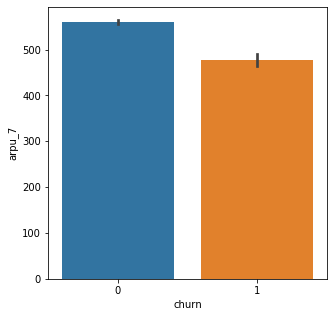

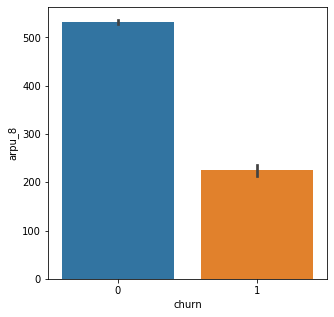

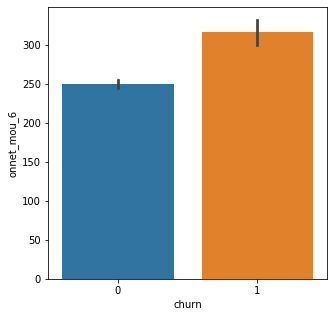

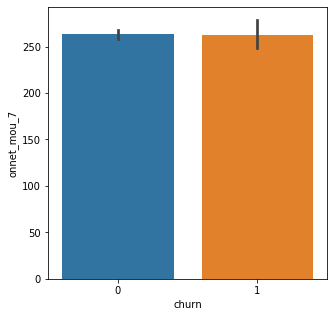

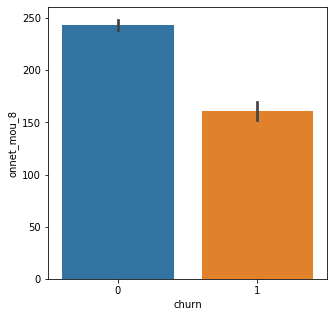

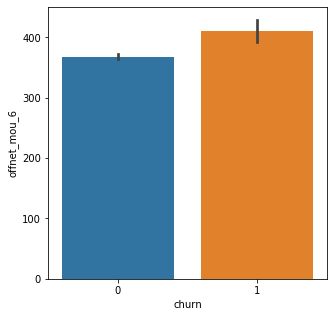

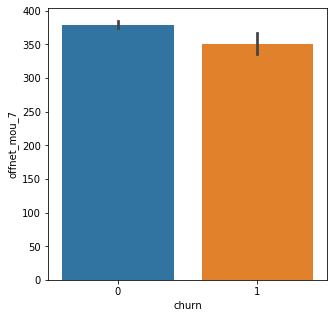

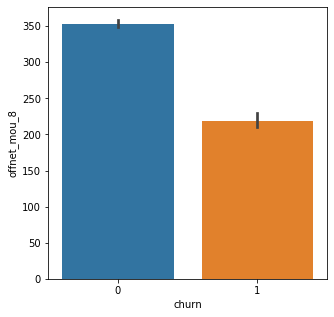

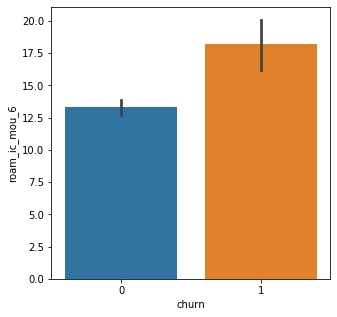

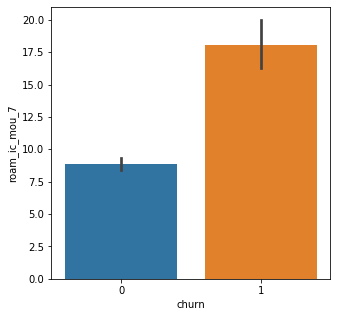

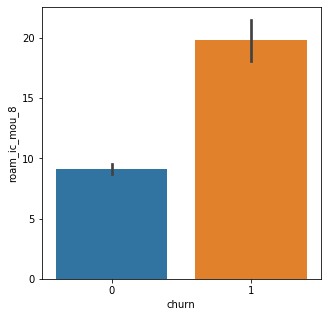

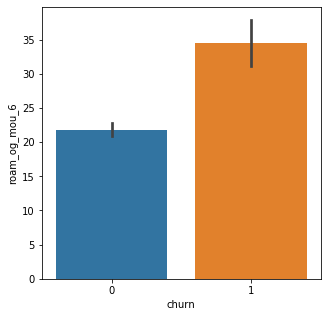

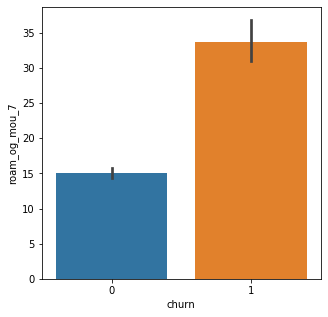

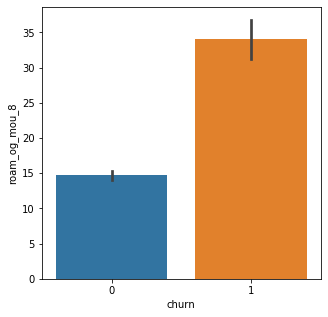

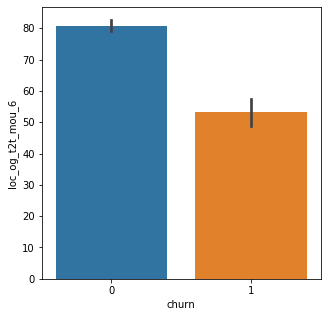

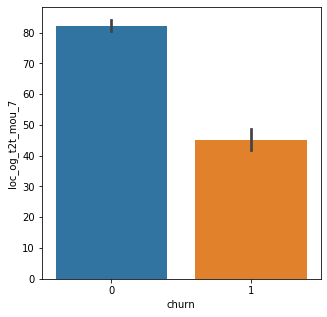

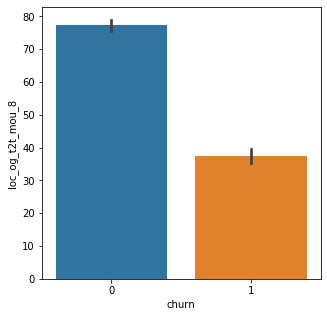

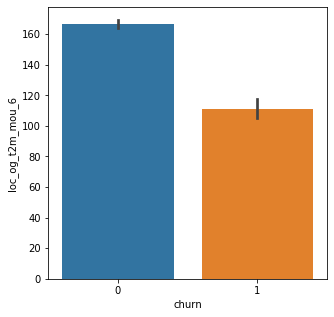

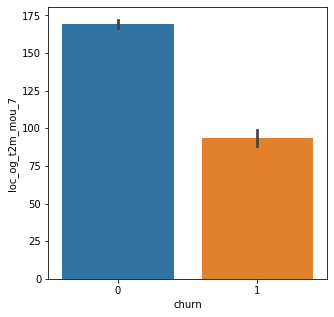

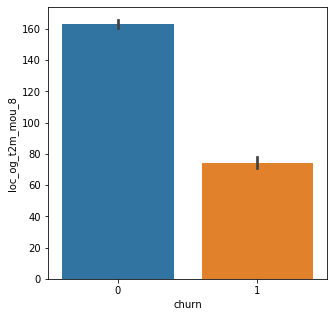

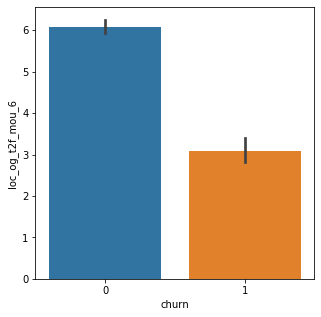

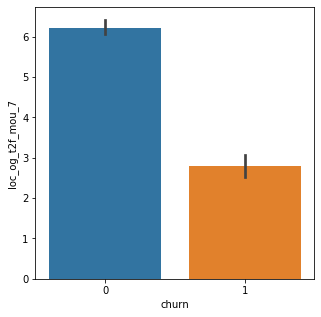

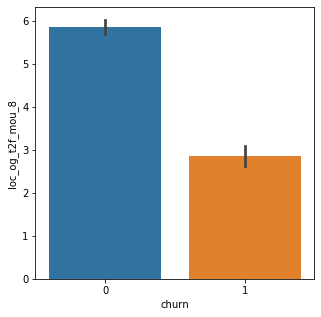

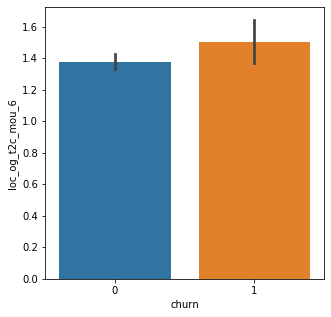

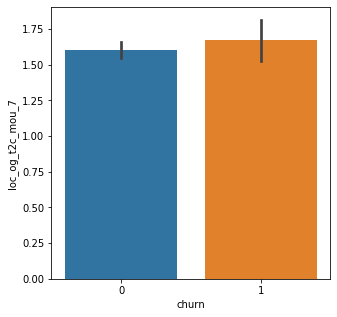

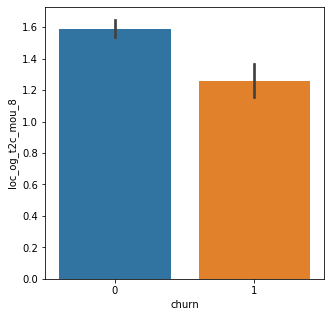

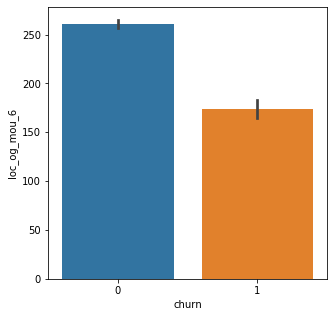

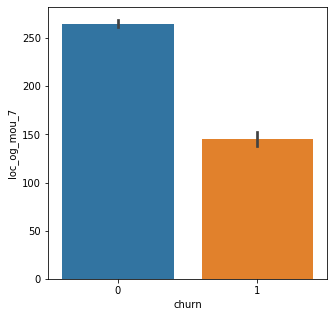

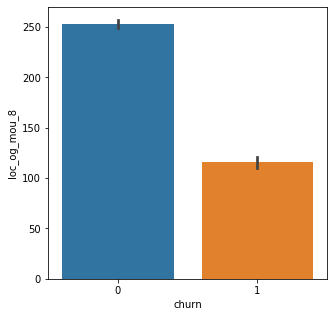

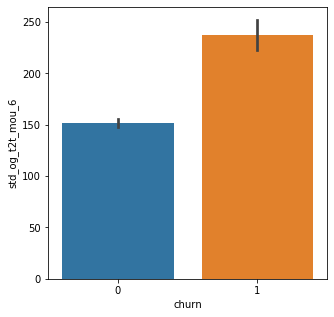

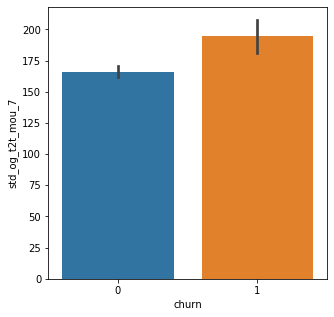

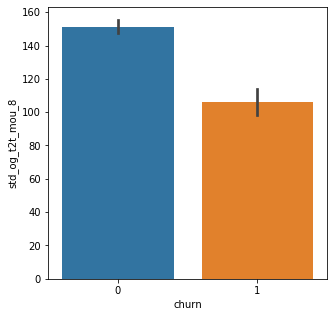

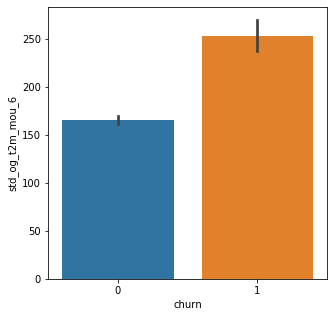

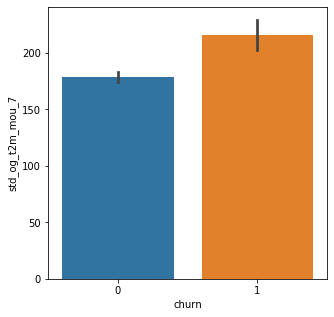

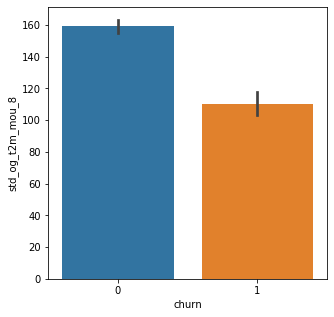

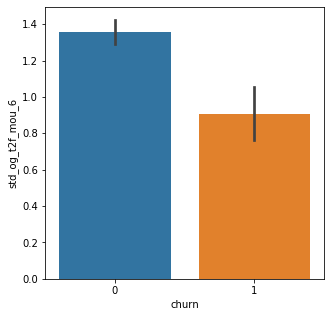

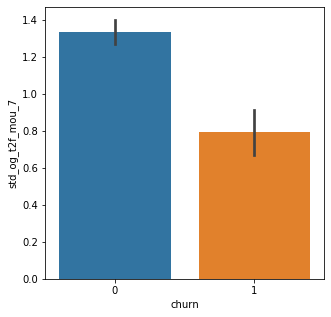

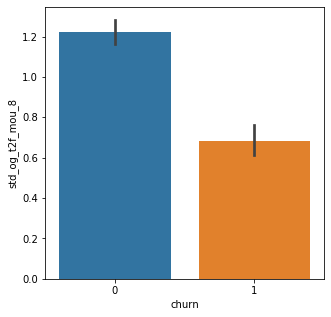

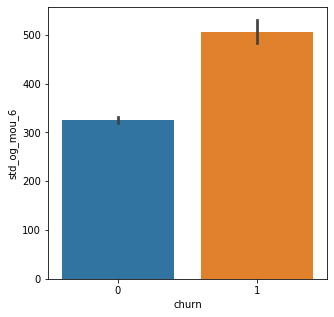

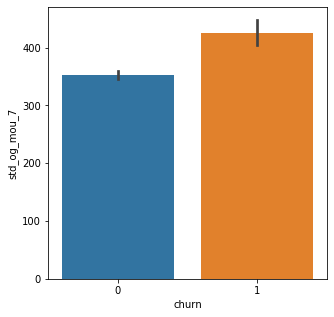

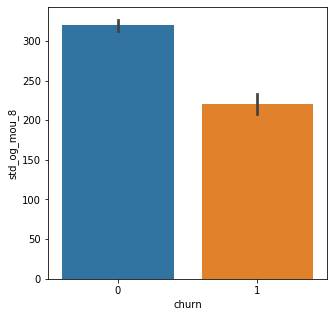

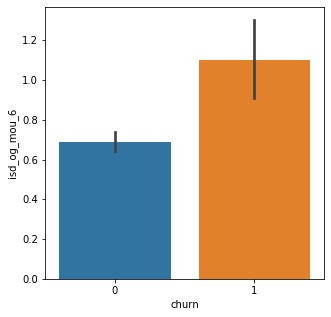

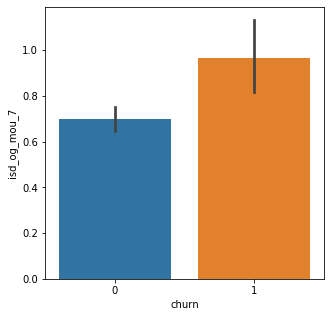

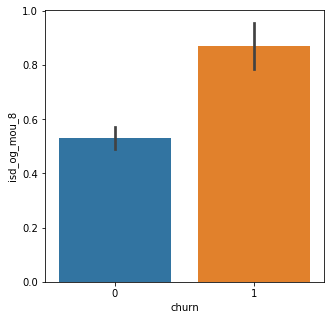

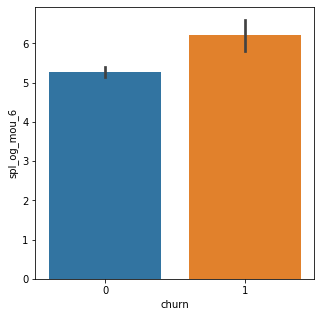

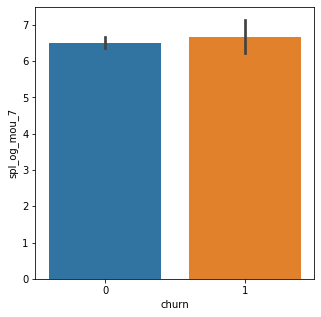

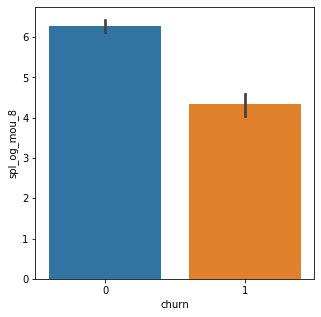

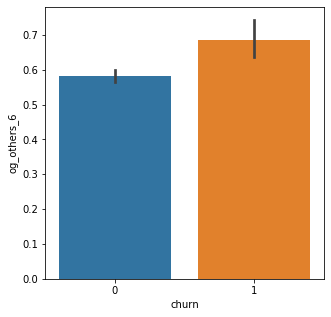

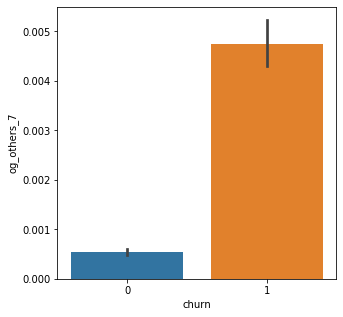

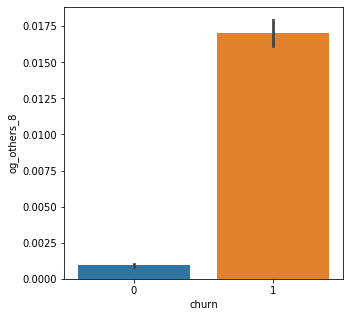

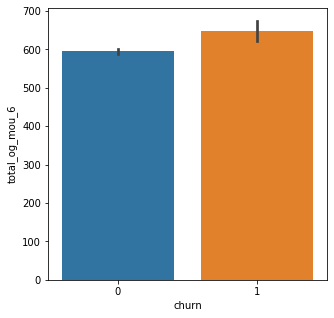

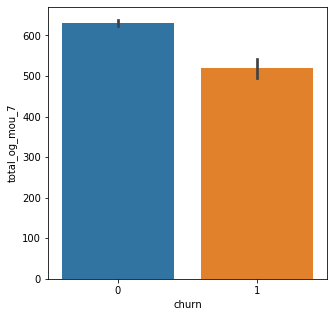

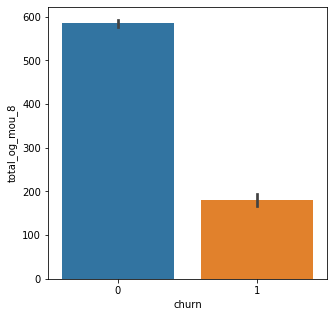

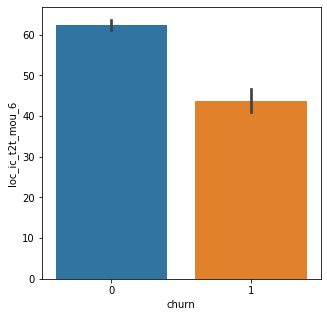

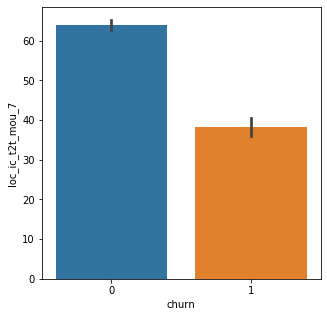

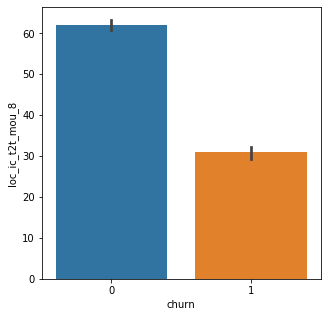

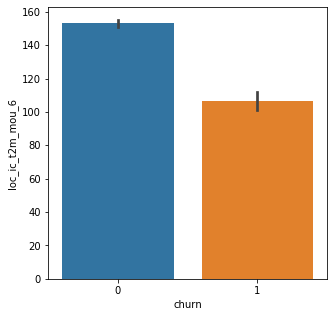

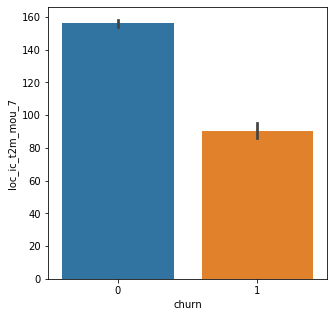

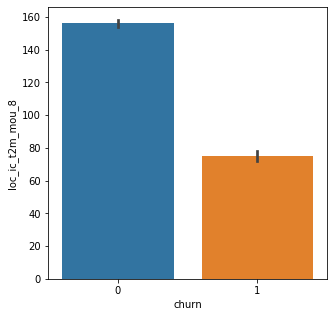

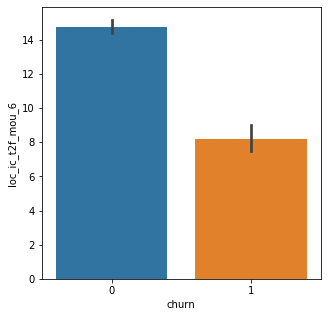

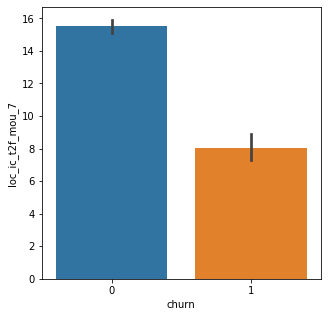

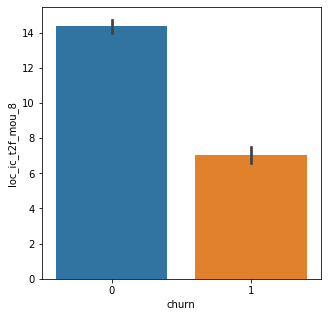

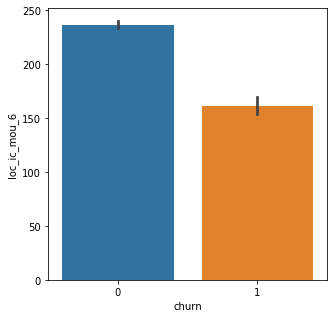

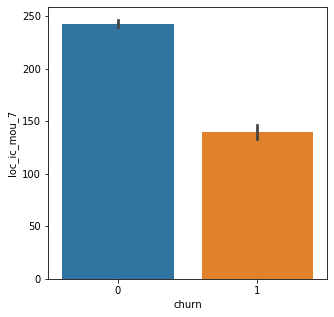

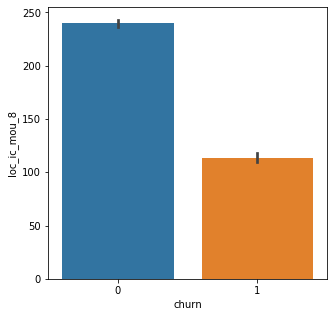

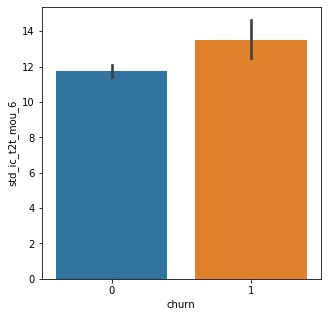

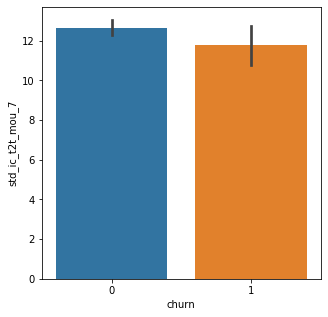

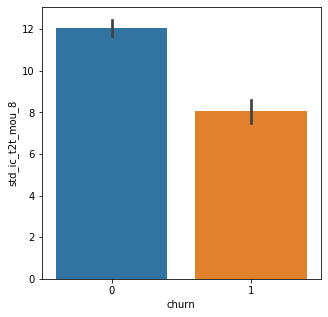

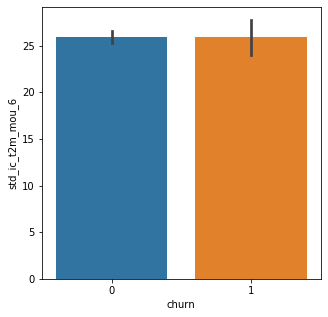

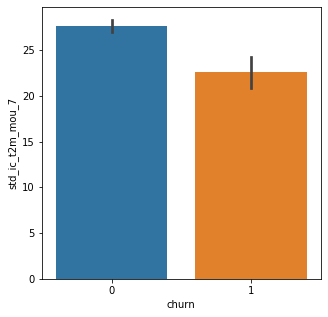

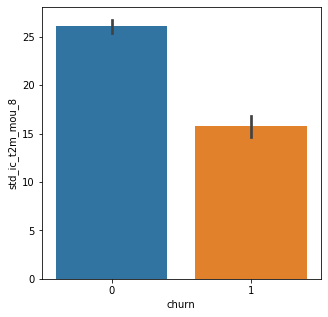

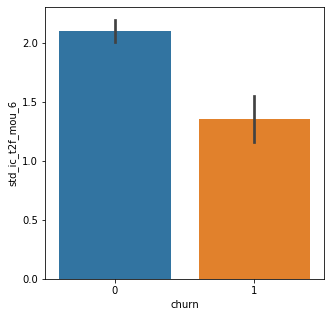

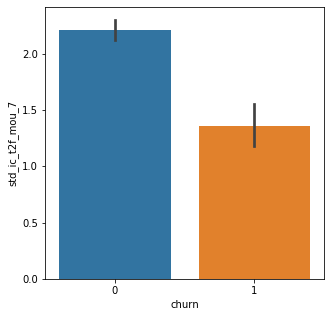

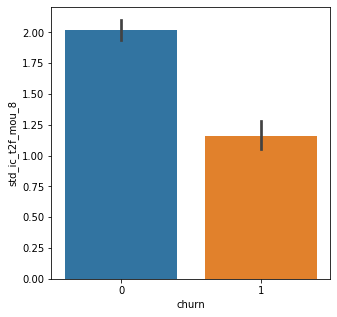

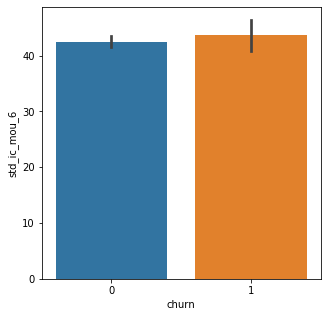

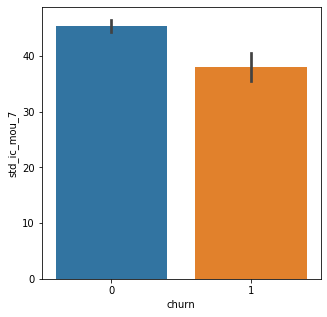

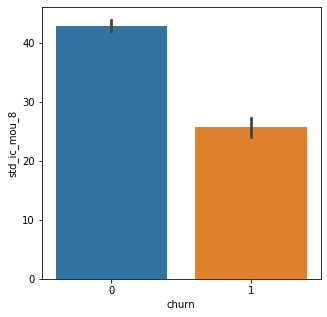

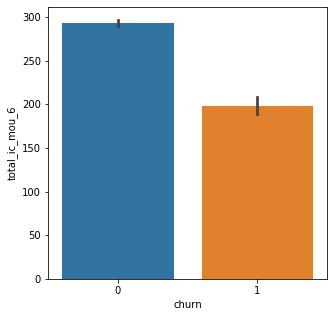

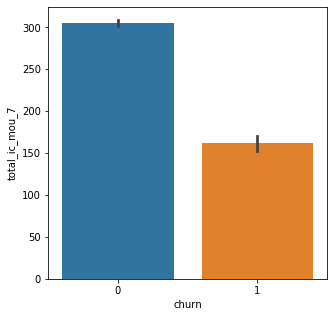

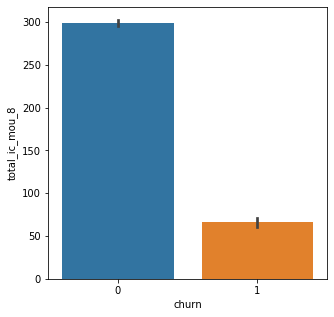

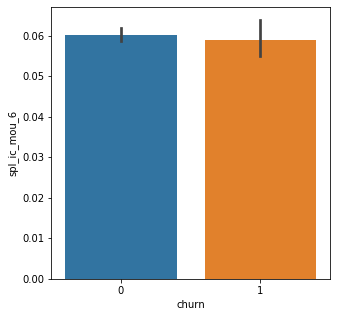

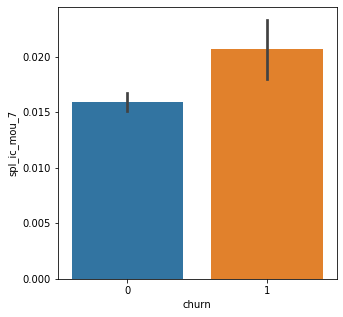

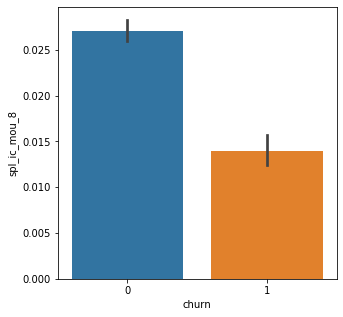

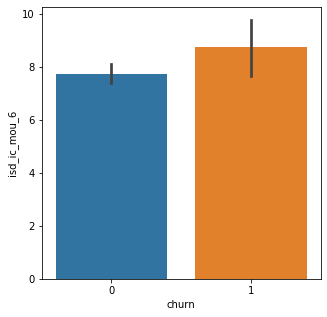

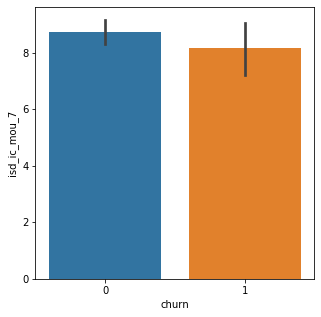

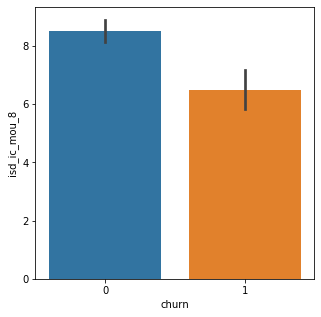

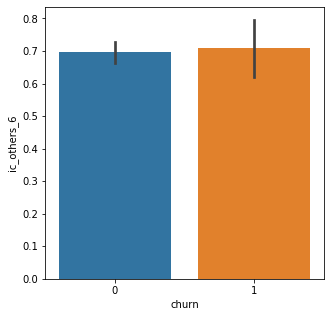

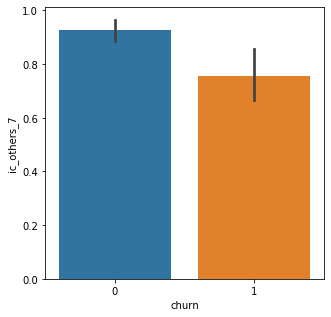

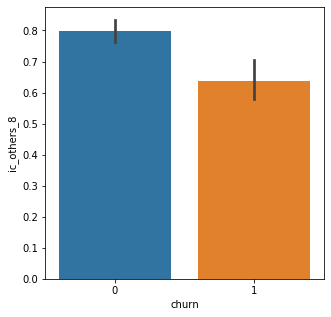

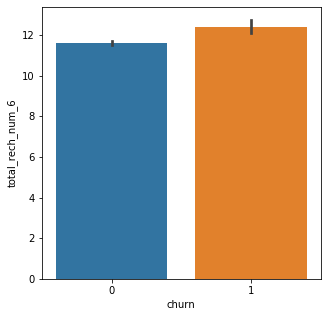

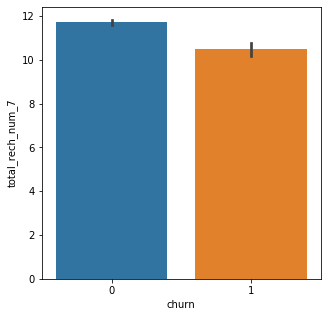

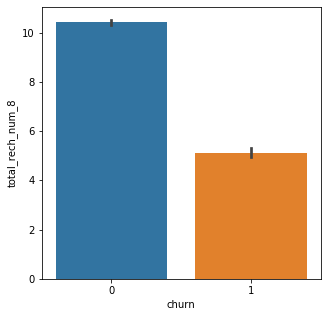

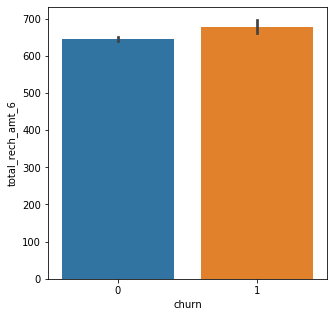

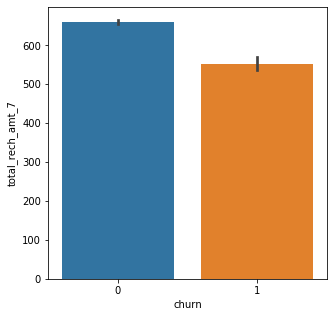

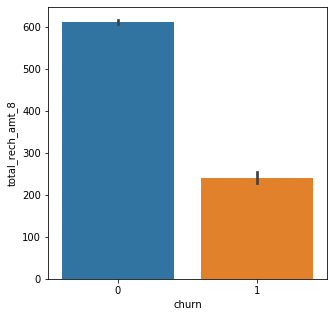

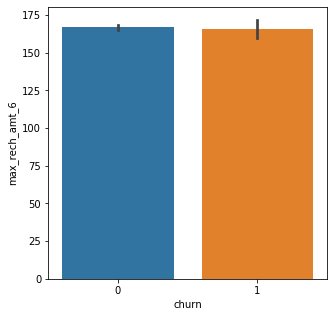

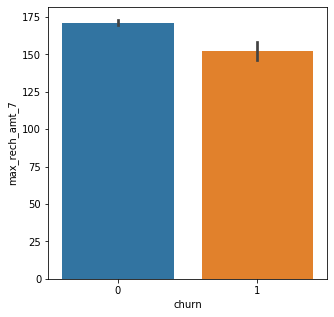

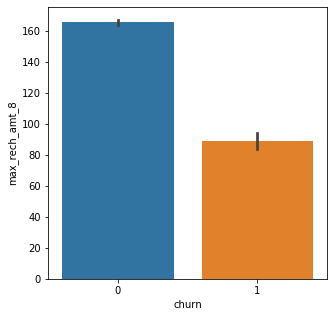

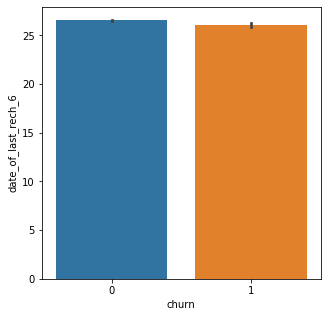

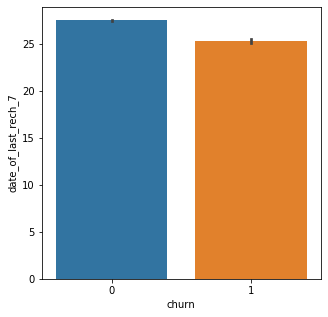

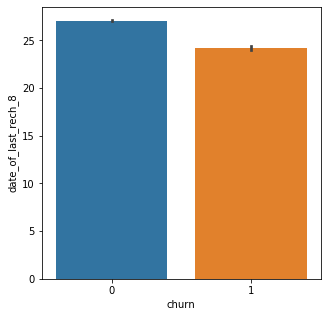

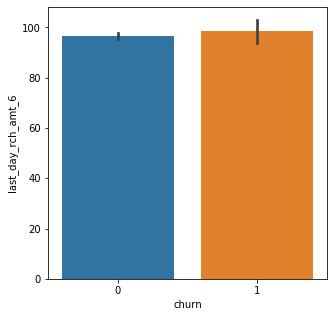

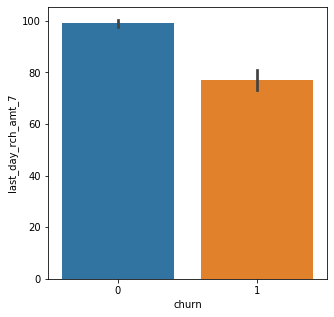

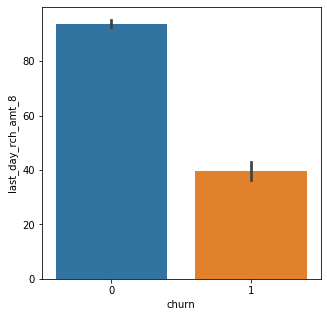

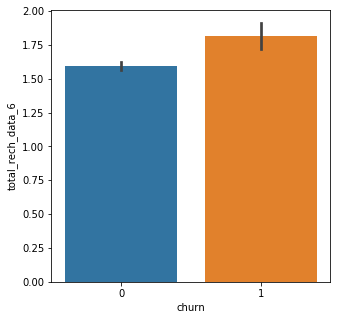

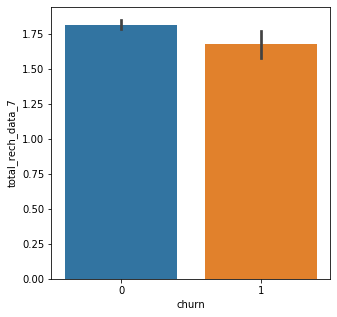

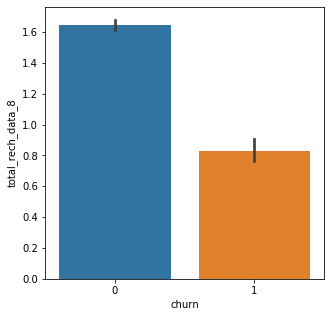

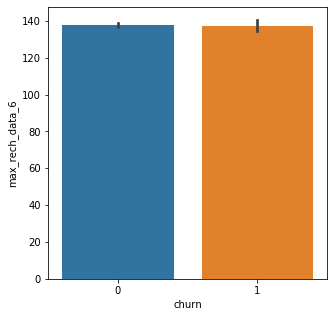

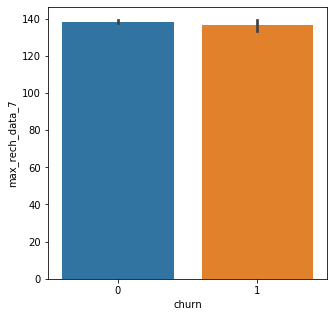

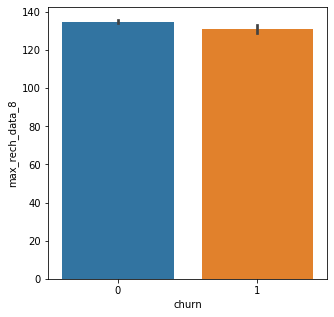

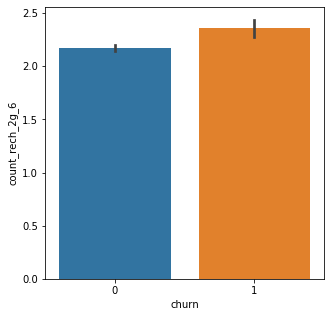

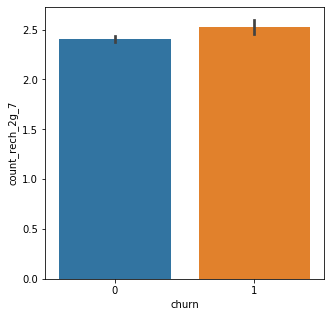

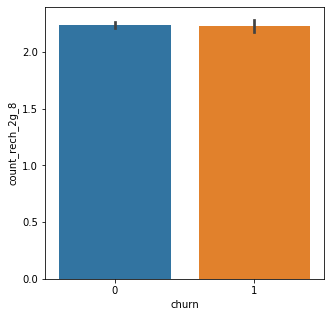

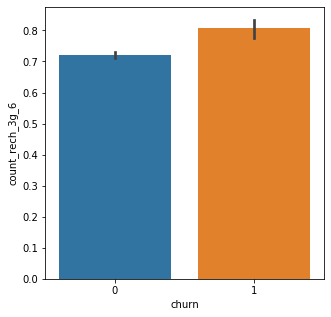

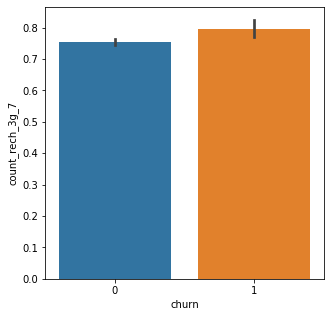

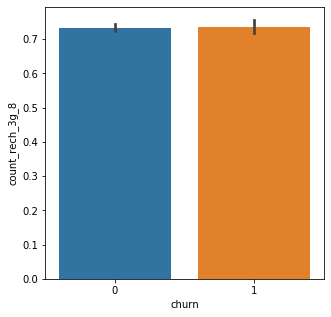

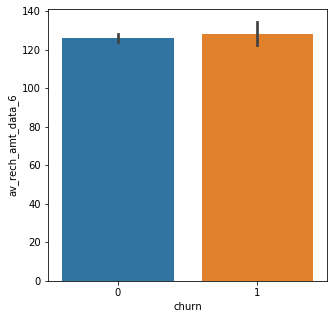

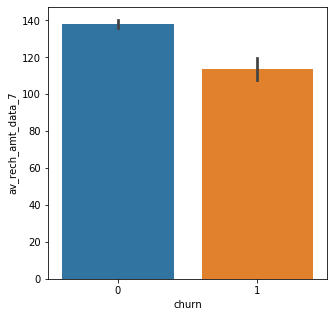

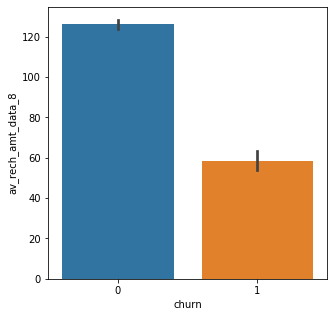

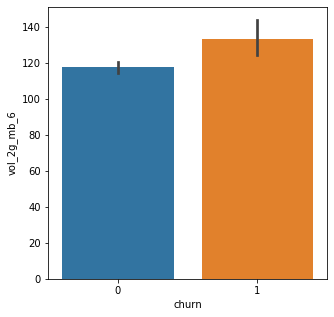

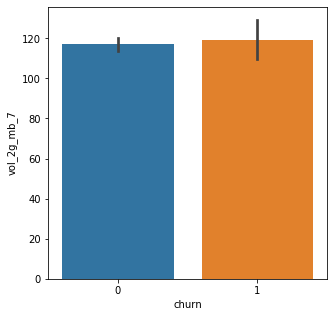

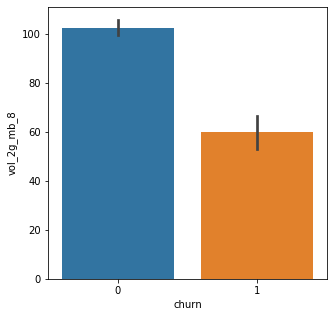

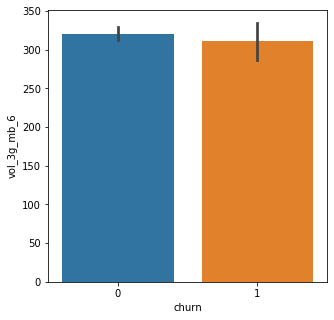

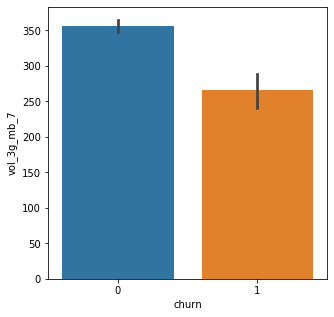

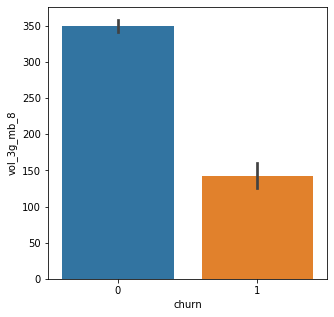

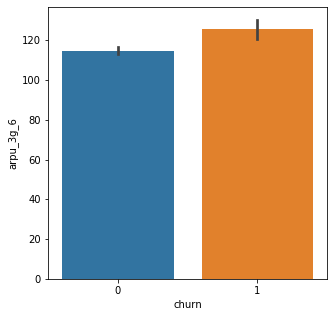

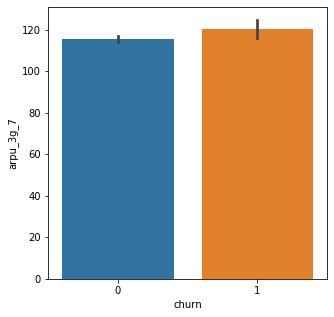

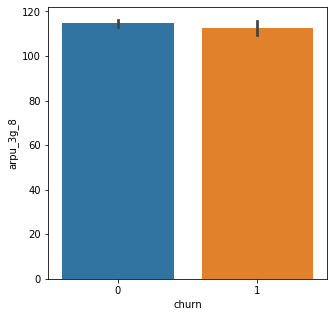

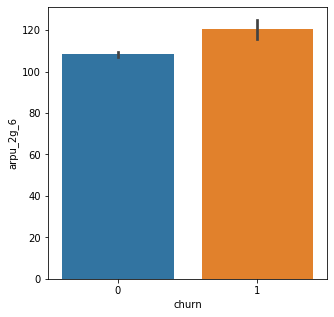

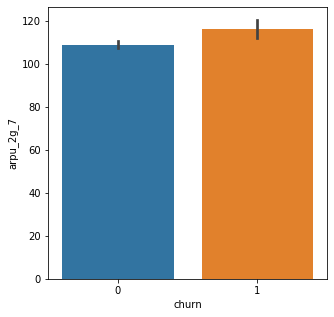

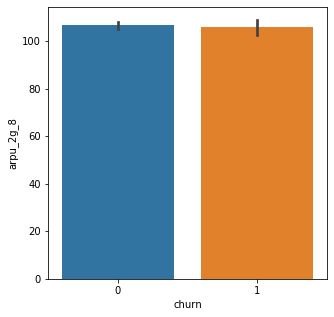

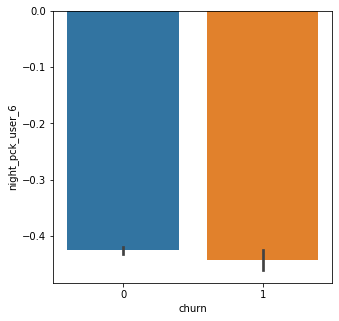

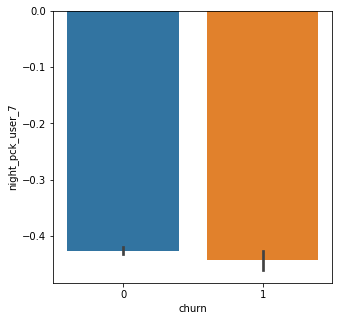

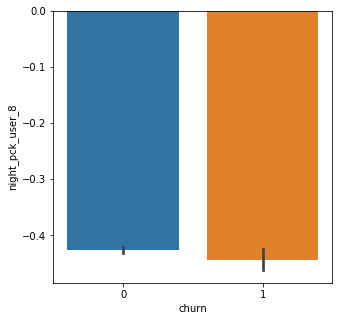

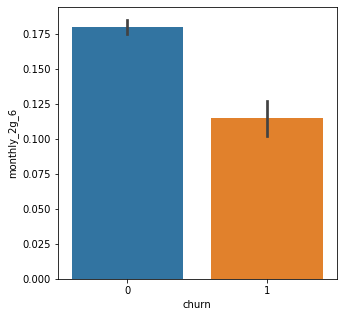

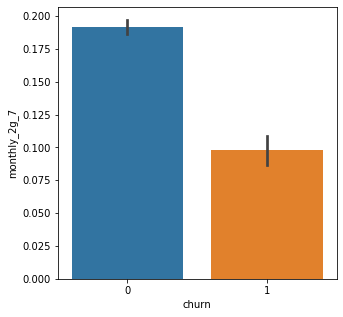

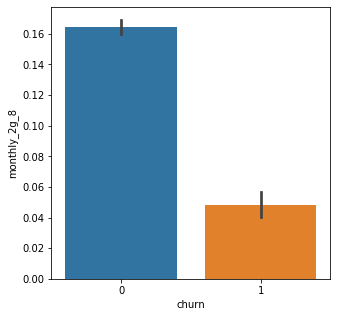

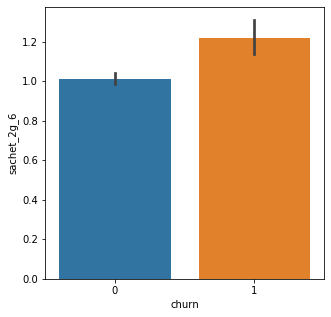

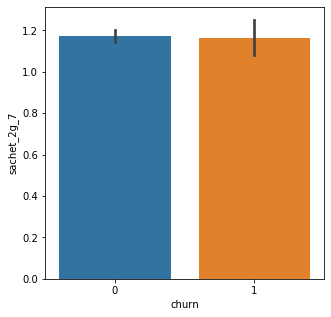

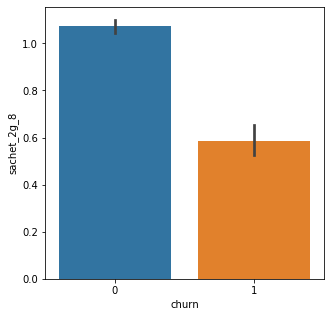

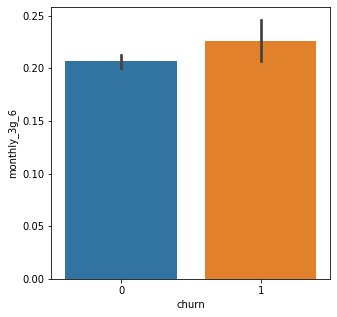

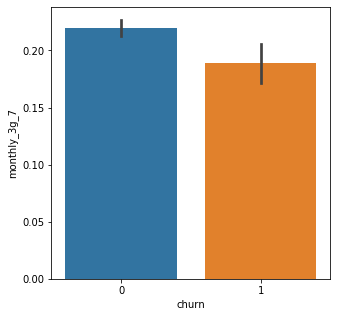

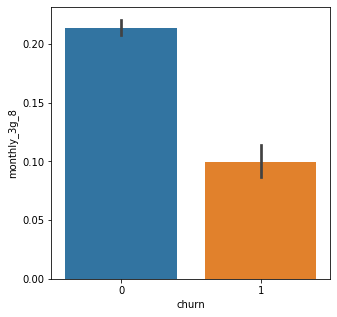

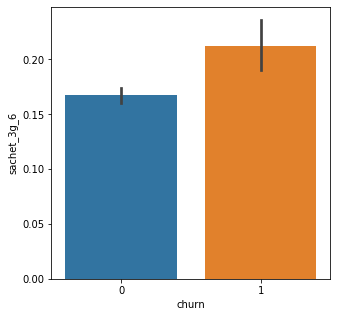

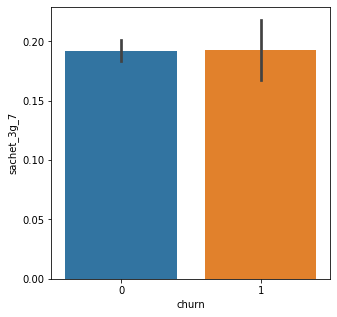

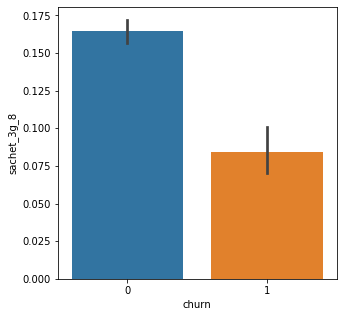

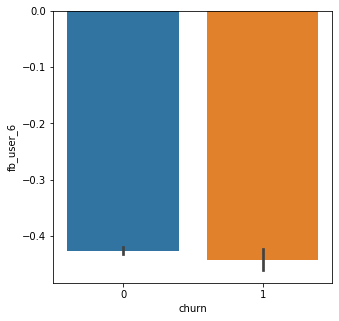

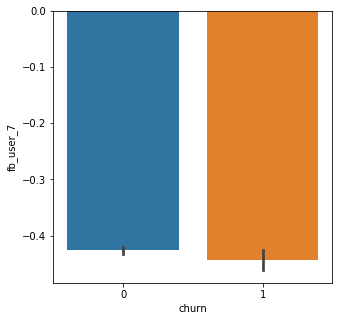

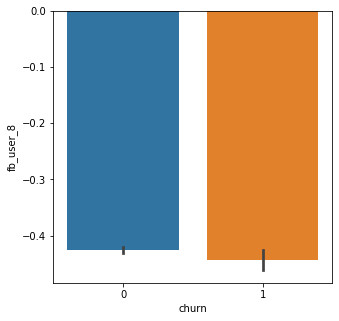

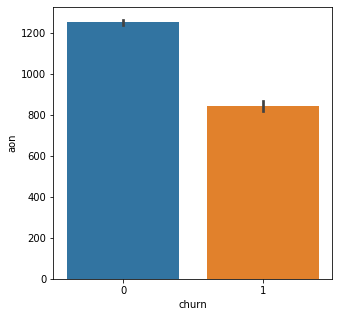

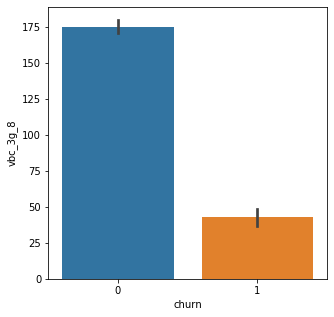

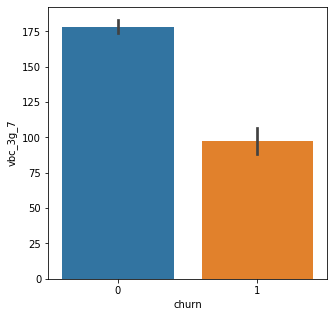

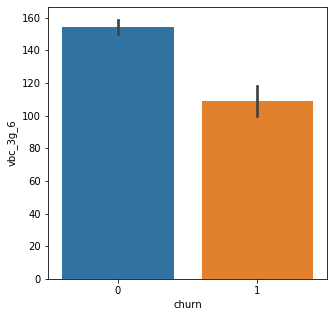

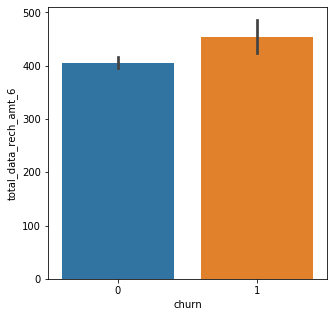

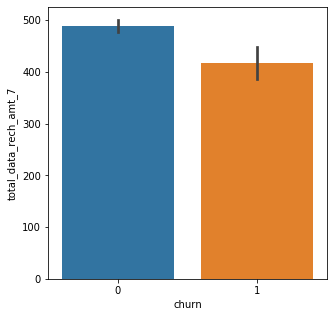

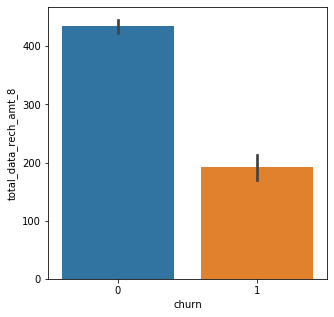

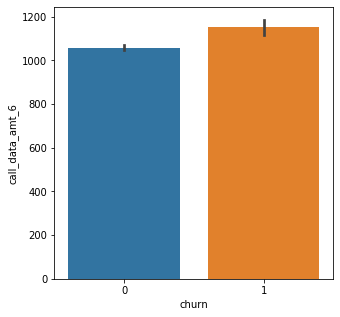

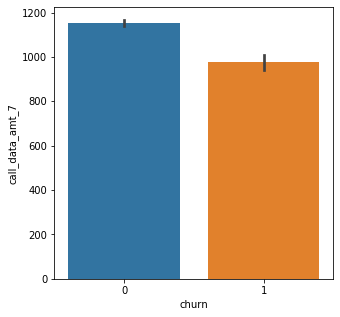

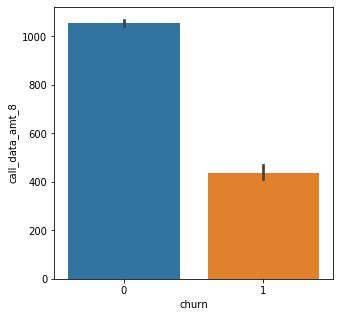

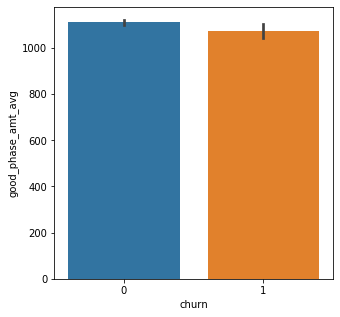

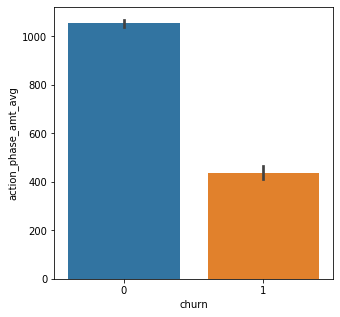

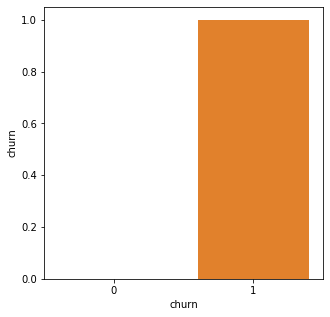

In [50]:
 #Univariate Analysis
cont_cols = [col for col in data_hvc.columns ]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=data_hvc)
    plt.show()

[Text(0, 0.5, '(%)')]

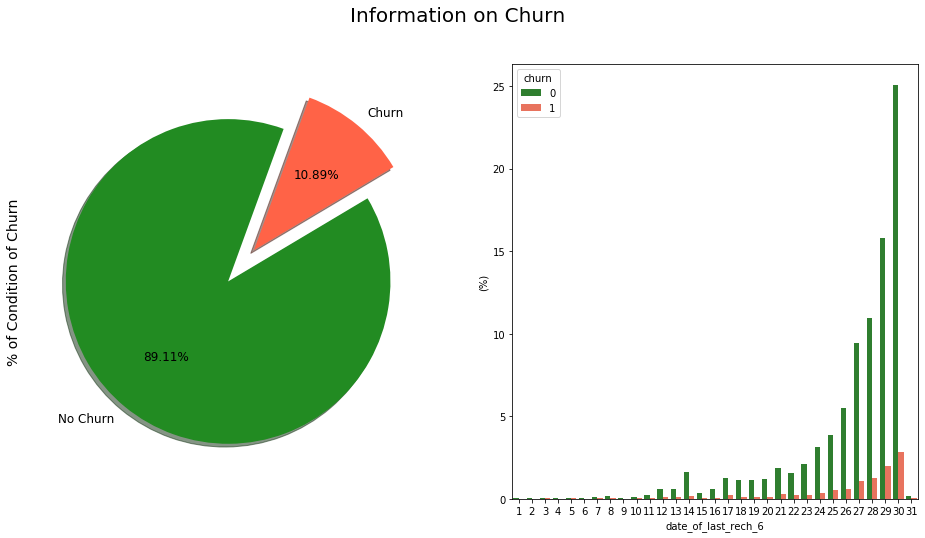

In [51]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#228B22", "#FF6347"]

labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)

data_hvc["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)

palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=data_hvc, palette=palette, estimator=lambda x: len(x) / len(data_hvc) * 100)
ax[1].set(ylabel="(%)")

### Correlation between variables

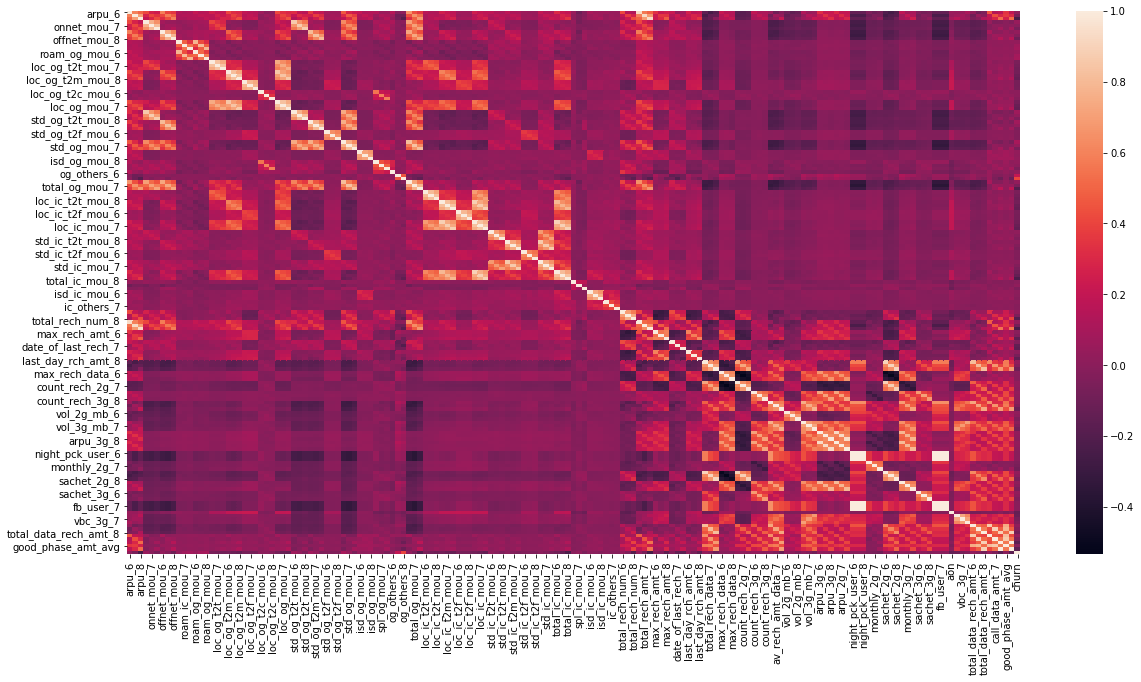

In [52]:
# Find correlation between columns
plt.figure(figsize=(20,10))
sns.heatmap(data_hvc.corr())
plt.show()

### Data Preparation for Models
### Dividing Training data into X and Y sets for model building

In [53]:
# Lets make a master dataframe after data cleaning step for data visualization
master_df=data_hvc
master_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,call_data_amt_6,call_data_amt_7,call_data_amt_8,good_phase_amt_avg,action_phase_amt_avg,churn
0,197.38,214.82,213.80,265.62,272.70,0.00,380.61,384.99,0.00,16.41,12.87,0.00,27.06,20.52,0.00,86.05,87.24,0.00,166.26,165.98,0.00,6.46,6.54,0.00,1.60,1.92,0.00,258.78,259.77,0.00,168.95,177.41,0.00,182.75,191.35,0.00,1.84,1.86,0.00,353.55,370.62,0.00,2.21,2.14,0.00,5.93,7.24,0.00,0.67,0.04,0.00,0.00,0.00,0.00,66.66,67.85,0.16,153.20,154.39,4.13,15.56,16.33,1.15,235.43,238.58,5.44,15.17,15.70,0.00,29.74,31.38,0.00,2.75,2.85,0.00,47.66,49.94,0.00,0.00,0.00,5.44,0.06,0.02,0.00,10.98,12.09,0.00,1.17,1.53,0.00,4,3,2,362,252,252,252,252,252,21,16,8,252,252,252,1.00,1.00,1.00,252.00,252.00,252.00,0.00,0.00,0.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.00,0.00,0.00,0,0,0,0,0,0,1,1,1,0,0,0,0.00,0.00,0.00,968,30.40,0.00,101.20,252.00,252.00,252.00,614.00,504.00,504.00,559.00,504.00,1
7,1069.18,1349.85,1986.62,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,51.38,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,2341,1000,790,951,27,25,26,0,0,565,0.00,0.00,0.00,139.80,140.43,136.33,2.22,2.46,2.27,0.76,0.80,0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,119.97,120.70,118.05,113.59,

Derived Variable

Age on Network(AON) Bins

In [54]:
#Create Derived variable through binning
master_df['aon_bin']=master_df['aon']/365
master_df['aon_bin'] = master_df['aon_bin'].astype(int)

In [55]:
master_numerical_df, master_categorical_df = column_type_analysis(master_df)

Total Numerical columns : 164
Total Categorical columns : 0


In [56]:
# Check the dataframe shape
nRow, nCol = master_df.shape
print("In master_df, there are ",nRow ,"rows and ",nCol," columns now")

In master_df, there are  30001 rows and  164  columns now


In [57]:
X = data_hvc[data_hvc.columns[~data_hvc.columns.isin(['churn'])]]
y = data_hvc['churn']

# Splitting data into Training and Testing Sets

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = 100)
# function to Calculate percentage
def calculate_percentage(value, base, round_digits = 2):
    return round((value/base)*100, round_digits)

print('Shape of training data : {}'.format(X_train.shape))
print('Percentage of churn rows in training data : {}'
      .format(calculate_percentage(len(y_train[y_train == 1]),len(y_train))))
print('Percentage of non-churn rows in training data : {}'
      .format(calculate_percentage(len(y_train[y_train == 0]),len(y_train))))
print('\n')
print('Shape of test data : {}'.format(X_test.shape))
print('Percentage of churn rows in test data : {}'
      .format(calculate_percentage(len(y_test[y_test == 1]),len(y_test))))
print('Percentage of non-churn rows in test data : {}'
      .format(calculate_percentage(len(y_test[y_test == 0]),len(y_test))))

Shape of training data : (21000, 163)
Percentage of churn rows in training data : 10.87
Percentage of non-churn rows in training data : 89.13


Shape of test data : (9001, 163)
Percentage of churn rows in test data : 10.93
Percentage of non-churn rows in test data : 89.07


Imbalance means that the number of data points available for the classes is different. Let's say if there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 85%-90% points for one class and 10%-15% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In [59]:
# Functions to do standard scaling and performing PCA on it
def standard_scaling(X_train, X_test):
    scaler = StandardScaler()
    # Perform Fit and Transform on Training Data
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

    # Perform only Transform on Test Data
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    
    return X_train_scaled, X_test_scaled

# Perform PCA
def perform_pca(X_train, X_test, scaled = False, incremental_pca = False, n_components = 60):
    if incremental_pca:
        pca = IncrementalPCA(n_components = n_components)
    else:
        pca = PCA(svd_solver='randomized', random_state = 100)
    
    if scaled:
        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()
    else:
        X_train_scaled, X_test_scaled = standard_scaling(X_train, X_test)

    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    return pca, X_train_pca, X_test_pca

In [60]:
# Function to Summarize Model
def summarize_model(y_true, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    print('False Positive Rate : {}'.format(false_positive_rate))
    print('True Positive Rate : {}'.format(true_positive_rate))
    print('Thresholds : {}'.format(thresholds))
    print('ROC AUC Score : {}'.format(roc_auc))
    print('Accuracy Score : {}'.format(accuracy_score(y_true, y_pred)))
    print('Precision Score : {}'.format(precision_score(y_true, y_pred)))
    print('Recall Score : {}'.format(recall_score(y_true, y_pred)))
    print('F1 Score : {}'.format(f1_score(y_true, y_pred)))
    print('Confusion Matrix : \n {}'.format(confusion_matrix(y_true, y_pred)))
    print('Classification Report : \n {}'.format(classification_report(y_true, y_pred)))
    
    plt.figure(figsize=(6, 6))
    plt.plot( false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % roc_auc )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# Model Building


# 1.Logistic Regression

Without PCA

False Positive Rate : [0.         0.01521766 1.        ]
True Positive Rate : [0.         0.38922764 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.6870049899045828
Accuracy Score : 0.9196755916009333
Precision Score : 0.7584158415841584
Recall Score : 0.38922764227642276
F1 Score : 0.5144392209536602
Confusion Matrix : 
 [[7895  122]
 [ 601  383]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      8017
           1       0.76      0.39      0.51       984

    accuracy                           0.92      9001
   macro avg       0.84      0.69      0.74      9001
weighted avg       0.91      0.92      0.91      9001



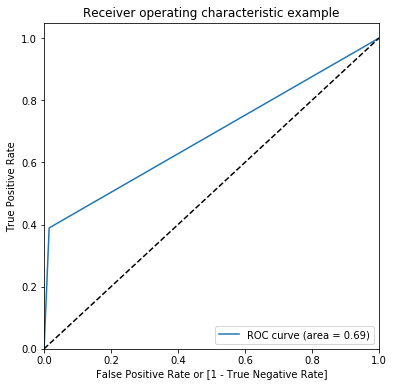

In [61]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score

log_reg_default_model = LogisticRegression()
log_reg_default_model.fit(X_train, y_train)

y_pred_log_reg_default = log_reg_default_model.predict(X_test)

summarize_model(y_test, y_pred_log_reg_default)

False Positive Rate : [0.         0.01920918 1.        ]
True Positive Rate : [0.         0.41666667 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.6987287430876055
Accuracy Score : 0.9191200977669148
Precision Score : 0.7269503546099291
Recall Score : 0.4166666666666667
F1 Score : 0.5297157622739018
Confusion Matrix : 
 [[7863  154]
 [ 574  410]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      8017
           1       0.73      0.42      0.53       984

    accuracy                           0.92      9001
   macro avg       0.83      0.70      0.74      9001
weighted avg       0.91      0.92      0.91      9001



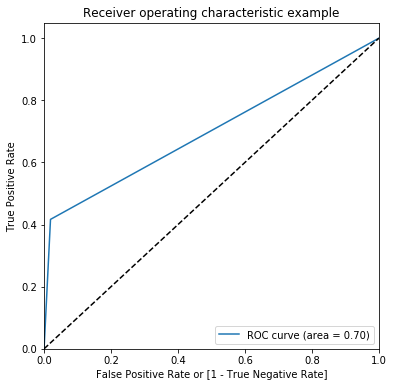

In [62]:
log_reg_default_pca, X_train_log_reg_default_pca, X_test_log_reg_default_pca = perform_pca(X_train, X_test)

log_reg_default_pca_model = LogisticRegression()
log_reg_default_pca_model.fit(X_train_log_reg_default_pca, y_train)

y_pred_log_reg_pca_default = log_reg_default_pca_model.predict(X_test_log_reg_default_pca)

summarize_model(y_test, y_pred_log_reg_pca_default)

From with and without class imbalance handling techniques, we can see smote data with PCA has better Recall and other parameters. 

So, Choosing PCA components for hyperparameter tuning for performance gains

# 2.Logistic Regression
With PCA

In [63]:
X_train_log_reg_scaled, X_test_log_reg_scaled = standard_scaling(X_train,X_test)

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, IncrementalPCA 

# Lets initialize PCA
default_incremental_pca = IncrementalPCA()

log_reg_pca_components = range(6, 61, 10)

log_reg_parameters = {'pca__n_components': log_reg_pca_components}

log_regression = LogisticRegression(n_jobs = -1)
log_reg_pipeline = Pipeline(steps=[('pca', default_incremental_pca),('log_regression', log_regression)])

### Hyperparameters Tuning

In [65]:
# Functions to create GRID Search
def create_grid_search(pipeline, parameters, scoring=['precision','recall', 'f1', 'roc_auc'], 
                        cv_fold_split = 5, refit = 'roc_auc'):
    folds = KFold(n_splits = cv_fold_split, shuffle = True, random_state = 100)
    
    display(parameters)

    grid_search = GridSearchCV(pipeline, cv = folds, param_grid = parameters,
                               scoring = scoring,
                               return_train_score = True, verbose = True,
                               refit = refit)
    
    return grid_search

# Function to perform GRID Search
def conduct_grid_search(grid_search, X_train, y_train, display_results = False):
    with parallel_backend('threading'):
        grid_search.fit(X_train, y_train)
        
    print('Best {} score after hyperparameters tuning : {}'.format(grid_search.refit, grid_search.best_score_))
    print('Best parameters after hyperparameters tuning for {} score : {}'\
          .format(grid_search.refit, grid_search.best_params_))

    cv_results = pd.DataFrame(grid_search.cv_results_)
    
    if display_results:
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            display(cv_results)
        
    return cv_results

In [66]:
# Create and conduct Grid Search on Logistic Regression Model
from sklearn.utils import resample, parallel_backend 

log_reg_grid_search = create_grid_search(log_reg_pipeline, log_reg_parameters)
log_reg_cv_results = conduct_grid_search(log_reg_grid_search, X_train_log_reg_scaled, y_train)

{'pca__n_components': range(6, 61, 10)}

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   41.9s finished


Best roc_auc score after hyperparameters tuning : 0.8810356653361513
Best parameters after hyperparameters tuning for roc_auc score : {'pca__n_components': 56}


#### Validating Hyperparameter tuning results

In [67]:
# Function to plot parameters
def plot_hyperparameters_subplot(dataframe, param, ax, xlabel, title = ''):
    if title:
        ax.set_title(title)
    else:
        ax.set_title('{} - AUC Score: Test vs Train'.format(xlabel))
        
    ax.plot(dataframe[param], 
         dataframe.mean_test_roc_auc, color='g')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Mean Test AUC Score', color='g')

    ax2 = ax.twinx()
    ax2.plot(dataframe[param], 
             dataframe.mean_test_recall, color='r')
    ax2.set_ylabel('Mean Test Recall Score', color='r')

def plot_hyperparameters(dataframe, param, xlabel):
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(111)
    plot_hyperparameters_subplot(dataframe, param, ax1, xlabel)
    plt.show()

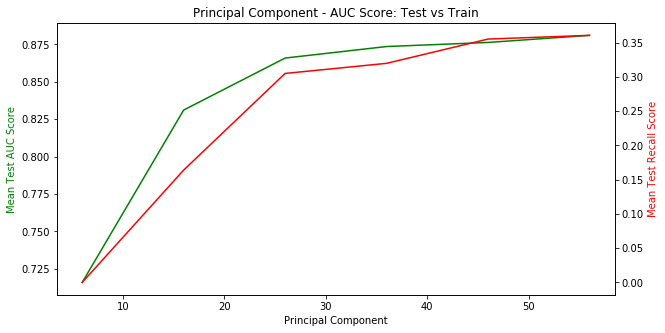

In [68]:
plot_hyperparameters(log_reg_cv_results, 'param_pca__n_components', 'Principal Component')

False Positive Rate : [0.         0.06311588 1.        ]
True Positive Rate : [0.        0.4796748 1.       ]
Thresholds : [2 1 0]
ROC AUC Score : 0.7082794589951638
Accuracy Score : 0.8869014553938451
Precision Score : 0.48261758691206547
Recall Score : 0.4796747967479675
F1 Score : 0.48114169215086644
Confusion Matrix : 
 [[7511  506]
 [ 512  472]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      8017
           1       0.48      0.48      0.48       984

    accuracy                           0.89      9001
   macro avg       0.71      0.71      0.71      9001
weighted avg       0.89      0.89      0.89      9001



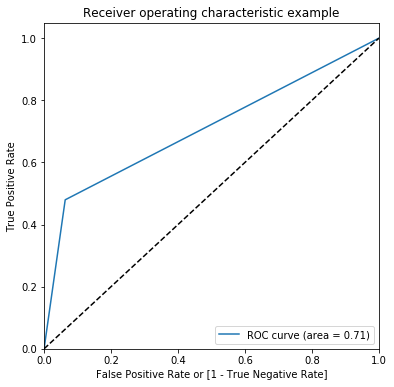

In [69]:
log_reg_pca, X_train_log_reg_pca, X_test_log_reg_pca = perform_pca(X_train_log_reg_scaled, X_test, 
                                                                   incremental_pca = True, n_components = 56)

final_log_reg = LogisticRegression()
final_log_reg.fit(X_train_log_reg_pca, y_train)

y_pred_log_reg = final_log_reg.predict(X_test_log_reg_pca)
summarize_model(y_test, y_pred_log_reg)

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

# 3.Decision Tree Classifier

Without PCA

False Positive Rate : [0.         0.06336535 1.        ]
True Positive Rate : [0.         0.50914634 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.7228904964146312
Accuracy Score : 0.8899011220975447
Precision Score : 0.4965312190287413
Recall Score : 0.5091463414634146
F1 Score : 0.5027596588058203
Confusion Matrix : 
 [[7509  508]
 [ 483  501]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      8017
           1       0.50      0.51      0.50       984

    accuracy                           0.89      9001
   macro avg       0.72      0.72      0.72      9001
weighted avg       0.89      0.89      0.89      9001



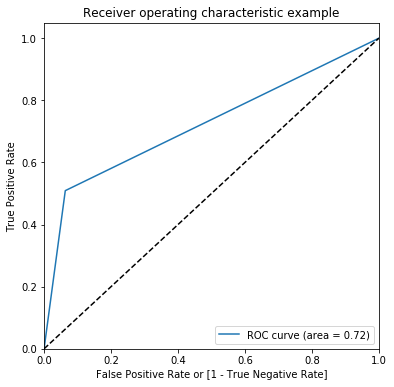

In [70]:
default_decision_tree = DecisionTreeClassifier(random_state = 100)

default_decision_tree.fit(X_train, y_train)

y_pred_decision_tree_default = default_decision_tree.predict(X_test)

summarize_model(y_test, y_pred_decision_tree_default)

Training Data imbalance technique with PCA seems to be providing best overall performance for churn class prediction. 

Hence, using the same for hyperparameters tuning

#### Initialize parameters and set pipeline

In [71]:
decision_tree_max_depth = range(1, 6, 1)
decision_tree_min_samples_leaf = range(1, 151, 50)

decision_tree_parameters = {'decision_tree__min_samples_leaf': decision_tree_min_samples_leaf,
                            'decision_tree__max_depth': decision_tree_max_depth}

decision_tree = DecisionTreeClassifier(random_state = 100)

decision_tree_pipeline = Pipeline(steps=[('decision_tree', decision_tree)])

#### Hyperparameters Tuning

In [72]:
# Create and Conduct Grid Search
decision_tree_grid_search = create_grid_search(decision_tree_pipeline, decision_tree_parameters)
decision_tree_cv_results = conduct_grid_search(decision_tree_grid_search, X_train_log_reg_scaled, y_train)

{'decision_tree__min_samples_leaf': range(1, 151, 50),
 'decision_tree__max_depth': range(1, 6)}

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   48.2s finished


Best roc_auc score after hyperparameters tuning : 0.8824216402875396
Best parameters after hyperparameters tuning for roc_auc score : {'decision_tree__max_depth': 5, 'decision_tree__min_samples_leaf': 101}


#### Validating Hyperparameters Tuning results

In [73]:
# Function to plot hyperparameters tuning results
def plot_params(dataframe, param, sub_param, param_name, sub_param_name):
    subplots_values = dataframe[param].unique()
    total_subplot_values = len(subplots_values)
    subplot_rows = math.ceil(total_subplot_values /2)
    fig = plt.figure(figsize = (25, subplot_rows * 6))
    for index, param_value in enumerate(subplots_values):
        param_ax1 = fig.add_subplot(subplot_rows, 2, (index + 1))
        plot_hyperparameters_subplot(dataframe[dataframe[param] == param_value], sub_param, 
                   param_ax1, sub_param_name, '{} = {}'.format(param_name, param_value))
    plt.show()

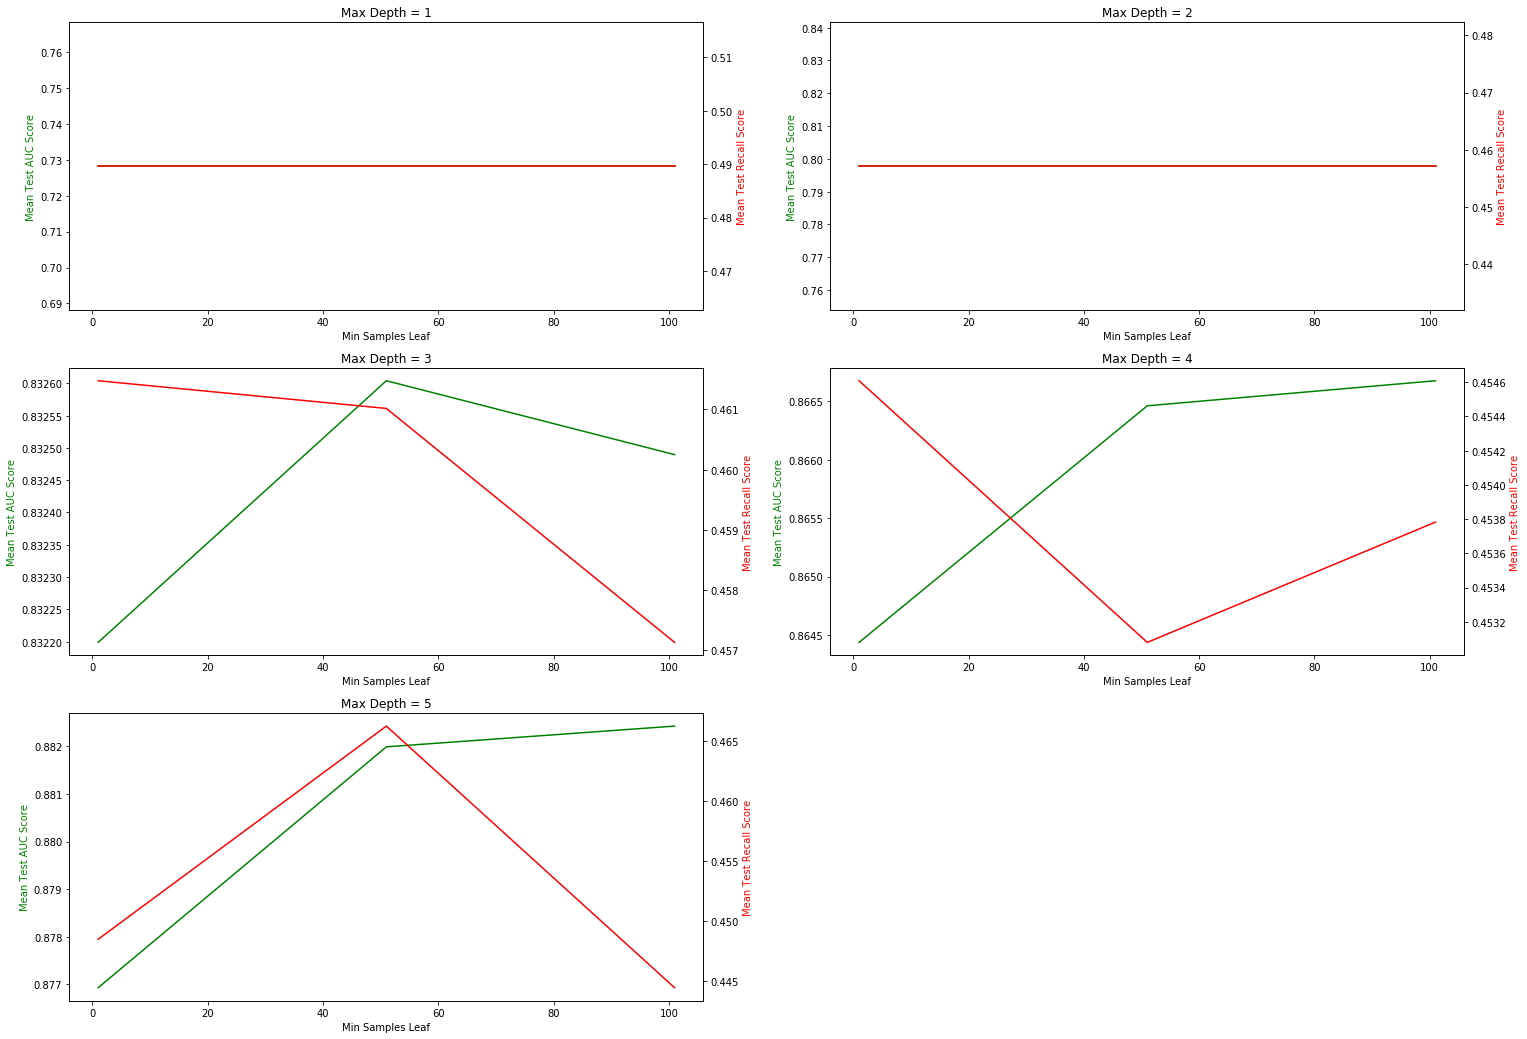

In [74]:
import math
plot_params(decision_tree_cv_results, 'param_decision_tree__max_depth',
                    'param_decision_tree__min_samples_leaf','Max Depth','Min Samples Leaf')

#### Final Decision Tree Classifier Model

False Positive Rate : [0.         0.06311588 1.        ]
True Positive Rate : [0.        0.4796748 1.       ]
Thresholds : [2 1 0]
ROC AUC Score : 0.7082794589951638
Accuracy Score : 0.8869014553938451
Precision Score : 0.48261758691206547
Recall Score : 0.4796747967479675
F1 Score : 0.48114169215086644
Confusion Matrix : 
 [[7511  506]
 [ 512  472]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      8017
           1       0.48      0.48      0.48       984

    accuracy                           0.89      9001
   macro avg       0.71      0.71      0.71      9001
weighted avg       0.89      0.89      0.89      9001



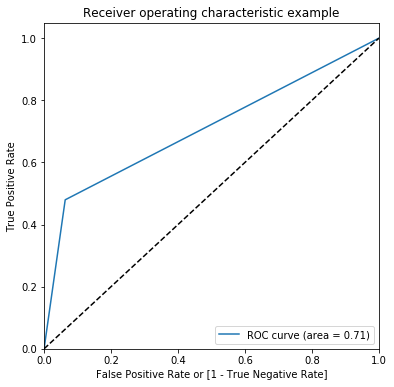

In [75]:
final_decision_tree = DecisionTreeClassifier(random_state = 100, min_samples_leaf = 50, max_depth = 5)
final_decision_tree.fit(X_train_log_reg_scaled, y_train)

y_pred_decision_tree = final_decision_tree.predict(X_test_log_reg_scaled)
summarize_model(y_test, y_pred_log_reg)


# 4.Random Forest Classifier


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


False Positive Rate : [0. 1.]
True Positive Rate : [0. 1.]
Thresholds : [1 0]
ROC AUC Score : 0.5
Accuracy Score : 0.8906788134651705
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
 [[8017    0]
 [ 984    0]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      8017
           1       0.00      0.00      0.00       984

    accuracy                           0.89      9001
   macro avg       0.45      0.50      0.47      9001
weighted avg       0.79      0.89      0.84      9001



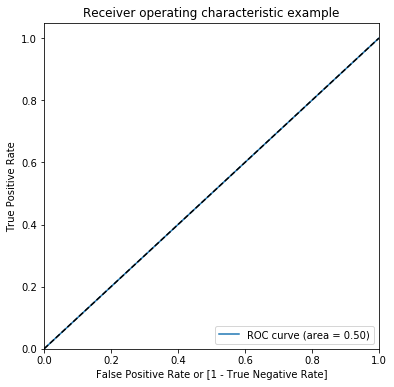

Out of Bag Error : 0.9211904761904762


In [76]:
random_forest_default_model = RandomForestClassifier(random_state = 100, oob_score = True, warm_start = True, 
                                                     verbose = 1, n_jobs= -1)
random_forest_default_model.fit(X_train_log_reg_scaled, y_train)

y_pred_random_forest_default = random_forest_default_model.predict(X_test)
summarize_model(y_test, y_pred_random_forest_default)
print('Out of Bag Error : {}'.format(random_forest_default_model.oob_score_))

#### Initialize parameters and set pipeline

In [77]:
random_forest_max_features = range(5, 61, 5)
random_forest_n_estimators = range(50, 251, 50)

random_forest_parameters = {'random_forest__max_features': random_forest_max_features, 
                           'random_forest__n_estimators': random_forest_n_estimators}

random_forest = RandomForestClassifier(random_state = 100, oob_score = True, warm_start = True, n_jobs= -1)

random_forest_pipeline = Pipeline(steps=[('random_forest', random_forest)])

#### Random Forest final model

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:    0.2s finished


False Positive Rate : [0. 1.]
True Positive Rate : [0. 1.]
Thresholds : [1 0]
ROC AUC Score : 0.5
Accuracy Score : 0.8906788134651705
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
 [[8017    0]
 [ 984    0]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      8017
           1       0.00      0.00      0.00       984

    accuracy                           0.89      9001
   macro avg       0.45      0.50      0.47      9001
weighted avg       0.79      0.89      0.84      9001



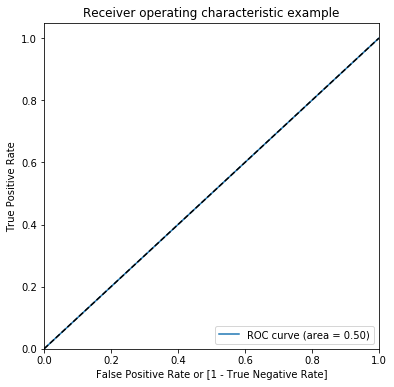

In [78]:
random_forest_final_model = RandomForestClassifier(random_state = 100, oob_score = True, warm_start = True, 
                                                     verbose = 1, n_jobs= -1, max_features = 15, n_estimators = 250)
random_forest_final_model.fit(X_train_log_reg_scaled, y_train)

y_pred_random_forest_final = random_forest_final_model.predict(X_test)
summarize_model(y_test, y_pred_random_forest_final)

# Identifying important churn indicators and business recommendation
All above mentioned algorithm implementations have also been tested with default data and after scaling. The same has also been tested with/without PCA to cross-check the performance with chosen class imbalance technique and PCA option.

All above mentioned algorithm implementations have also been hypertuned and tested with other parameters.

For each implemented algorithm, only the class imbalance technique with PCA option and hyperparameter tuning providing the best result have been retained above.

Following class imbalance and PCA option have been used for above mentioned algorithm implementation:

Scaled train data set without PCA for decision trees based algorithms.
Default train data set without PCA for balanced decision trees based algorithms.
Random Forest and logistic regression models are good but Out of all implemented algorithms, Decision Tree seems to be the best model for churn prediction based on selected evaluation metrics of Recall and AUC Score after hyperparameters tunings.

# Model Features Selection
#### Importance Features Selection Model

In [80]:
from sklearn.feature_selection import SelectFromModel

sel =   (final_decision_tree)
sel.fit(X_train_log_reg_scaled, y_train)

important_features_results = pd.DataFrame(list(zip(X_train.columns, sel.get_support(), 
                                            final_decision_tree.feature_importances_)))
important_features_results.columns = ('column_name', 'support', 'importance')
important_features_results = important_features_results[important_features_results['support'] == True]
important_features_results.reset_index(inplace = True, drop = True)
important_features_results.drop('support', axis = 1, inplace = True)
important_features_results = important_features_results.sort_values(by='importance', ascending = False)
kpi_results = important_features_results['column_name']
display(important_features_results)

,column_name,importance
7,total_ic_mou_8,0.68
0,arpu_8,0.08
12,vbc_3g_8,0.07
5,total_og_mou_8,0.02
3,loc_og_t2f_mou_8,0.02
9,last_day_rch_amt_8,0.02
6,loc_ic_mou_8,0.02
2,roam_og_mou_8,0.02
4,std_og_mou_7,0.01
8,date_of_last_rech_8,0.01


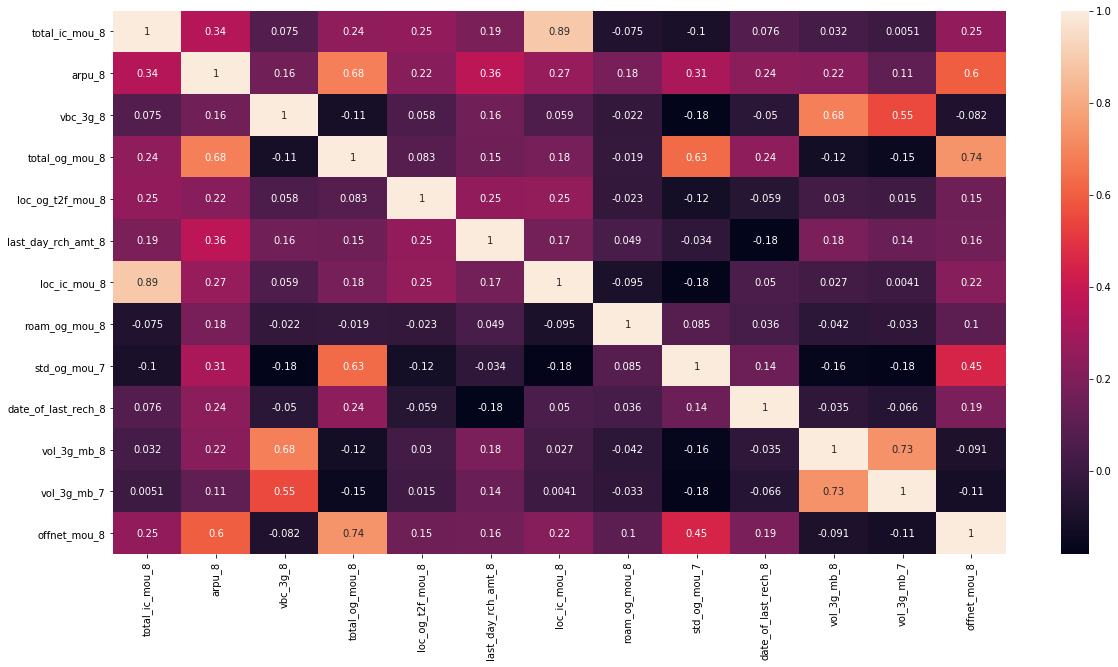

In [81]:
#Analyse the columns KPIs
plt.figure(figsize = (20, 10))
sns.heatmap(X_train[kpi_results].corr(), annot = True)
plt.show()

In [82]:
# Create correlation matrix
kpi_corr_matrix = X_train[kpi_results].corr().abs()

# Select upper triangle of correlation matrix
kpi_upper = kpi_corr_matrix.where(np.triu(np.ones(kpi_corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.5
kpi_corr_columns = [column for column in kpi_upper.columns if any(kpi_upper[column] >= 0.5)]

print('KPI corelated columns : \n {}'.format(kpi_corr_columns))

important_feature_results_without_corr = important_features_results[~important_features_results['column_name']
                                                       .isin(kpi_corr_columns)].copy()

important_features_results_without_corr = important_feature_results_without_corr['column_name']
display(important_feature_results_without_corr)

KPI corelated columns : 
 ['total_og_mou_8', 'loc_ic_mou_8', 'std_og_mou_7', 'vol_3g_mb_8', 'vol_3g_mb_7', 'offnet_mou_8']


,column_name,importance
7,total_ic_mou_8,0.68
0,arpu_8,0.08
12,vbc_3g_8,0.07
3,loc_og_t2f_mou_8,0.02
9,last_day_rch_amt_8,0.02
2,roam_og_mou_8,0.02
8,date_of_last_rech_8,0.01


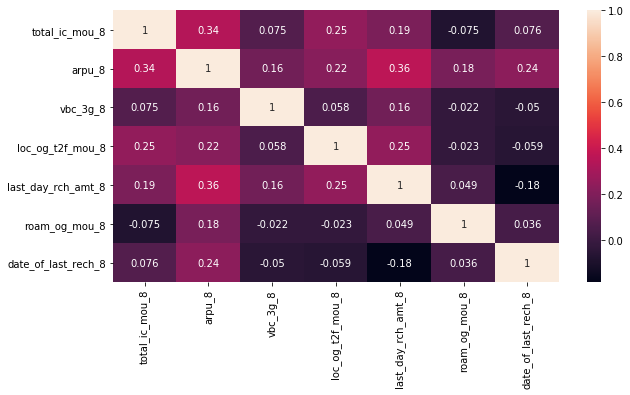

In [83]:
#validate final selected features
plt.figure(figsize = (10, 5))
sns.heatmap(X_train[important_features_results_without_corr].corr(), annot = True)
plt.show()

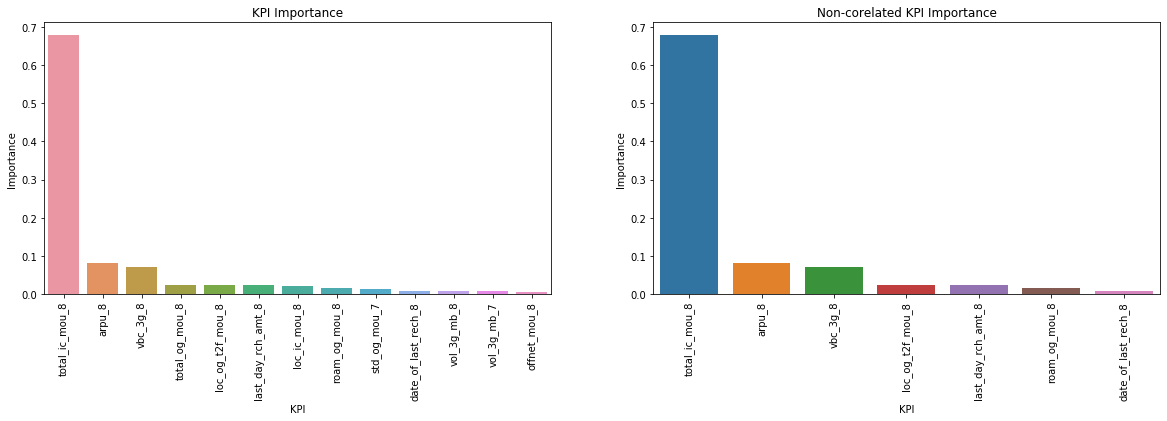

In [84]:
plt.figure(figsize=(20, 5))

plt.subplot(121)

feature_plot = sns.barplot(x='column_name', y= 'importance', data=important_features_results, 
                           order = important_features_results['column_name'])
feature_plot.set(xlabel = 'KPI', ylabel = 'Importance', title='KPI Importance')

for label in feature_plot.get_xticklabels():
    label.set_rotation(90)

plt.subplot(122)

feature_plot = sns.barplot(x='column_name', y= 'importance', data=important_feature_results_without_corr, 
                           order = important_feature_results_without_corr['column_name'])
feature_plot.set(xlabel = 'KPI', ylabel = 'Importance', title='Non-corelated KPI Importance')

for label in feature_plot.get_xticklabels():
    label.set_rotation(90)
    
plt.show()

# Business Recommendations and Conclusion
Churn customers have clear distinct behavioural usage pattern when compared to Non-Churn customers.

1. Churn customers are using more roaming outgoing calls, generating more average revenue per user as compared to Non-Churn customers. Hence, they seem to be a part of customer-base frequently travelling between different circles.

2. Age on Network for Churn customers is also less as compared to Non-Churn customers as they seem to be frequently switching telcom operators for cost saving. Also, the same is supported by the fact that the Churn customers recharges with lesser amount but more frequently when compared to Non-churn customers. They seem to be recharging as and when required.

3. Non-Churn customers are using more Incoming calls and 3g volume as compared to Churn customers. Hence, they seem to be a part of customer-base operating within same circle.

4. Voice usage(incoming) in mostly "action phase" seems a key feature in determining the Churn and hence company should keep track on the voice usage and also provide incentives/offers to users who are categorised by the model as potential churners.

5. Difference or change(decrease) in the arpu should be taken as key hint for the user to churn and necessary action should be taken for the user showing significant change in the arpu.

6. Last Day Recharge amount in action month is a key indicator to decide if customer is likely to churn or not.

7. It is also observed that recharge amount and minutes of usage, need to be used as a focus and a potential warning of churn.